# process of collecting data

I've selected FAO site (https://www.fao.org/faostat/en/#data,), because it has lots of information on agriculture and allow us to query data on diferent indicators like production, population, imports/exports etc and export queries on a csv file.

In [1]:
# I've selected diferent indicators for my study on FAO site, by querying the data I wanted (picture below)
# I've selected one item to create dataset, in order to have numerical value columns by item

# a GDP image of FAOSTAT is loaded by using the following library Ipython that allows me to import my screenshot on FAO for the query

from IPython.display import Image
img = 'gdp.jpg'
Image(url=img)

 to create g.d.p.csv file

 select: 
 - countries: European countries (list of 27, UK not included)
 - elements: value in Million USD (FAO doesn't have EURO)
 - Items: Gross Domestic Product (GDP)
 - Year: I've selected 2010 to 2020 considered enough for my analyse


 to create urban_pop.csv file

 select: 
 - countries: European countries (list of 27, UK not included)
 - elements: Urban population
 - Items: Population - Est. & Proj.
 - Year: I've selected 2010 to 2020 considered enough for my analyse


 to create rural_pop.csv file

 select: 
 - countries: European countries (list of 27, UK not included)
 - elements: Rural population
 - Items: Population - Est. & Proj.
 - Year: I've selected 2010 to 2020 considered enough for my analyse


 to create production.csv file

 select: 
 - countries: European countries (list of 27, UK not included)
 - elements: Gross Production Value (current thousand US$)
 - Items: Agriculture
 - Year: I've selected 2010 to 2020 considered enough for my analyse


# DATA PREPROCESSING

In [7]:
# Now that I have the dataset, I import libraries to start my analyse
# those libraries will allow me to import, use, transform, and plot data

import numpy as np 
import pandas as pd
import matplotlib.pyplot as plt
import matplotlib as mpl
import seaborn as sns

# to avoid and ignore useless error messages I use warnings
import warnings            
warnings.filterwarnings("ignore") 

In [8]:
# loading the four datasets I've created on FAO site
# using Panda.read function, I can import those datasets to my notebook

df1 =pd.read_csv("urban_pop.csv")
df2 =pd.read_csv("rural_pop.csv")
df3 =pd.read_csv("g.d.p.csv")
df4 =pd.read_csv("production.csv")

In [9]:
# I change names on datasets, so I can have item on the columns with numbers 
# instead of value, and also country on area
# The rename function allows me to change data from old one to the new one 

df1 = df1.rename(columns = {"Value":"urban population", "Area":"Country"})
df2 = df2.rename(columns = {"Value":"rural population" ,"Area":"Country"})
df3 = df3.rename(columns = {"Value":"GDP","Area":"Country"})
df4 = df4.rename(columns = {"Value":"Agric. production","Area":"Country"})

In [10]:
# merge datasets into a consolidated one, using concatenate, 
# that will join datasets by identical rows (year, country)

df=pd.concat([df1, df2,df3,df4],axis=1)


at this stage, we need to pre-process data in order to make it useful for out analyse

In [11]:
# I clean the dataset, by deleting useless columns for my analyse, 
# so I can have numerical values to use for Analise 

df.drop('Domain Code', axis = 1, inplace = True)
df.drop('Domain', axis = 1, inplace = True)
df.drop('Element Code', axis = 1, inplace = True)
df.drop('Element', axis = 1, inplace = True)
df.drop('Item Code (CPC)', axis = 1, inplace = True)
df.drop('Item Code', axis = 1, inplace = True)
df.drop('Item', axis = 1, inplace = True)
df.drop('Year Code', axis = 1, inplace = True)
df.drop('Flag', axis = 1, inplace = True)
df.drop('Unit', axis = 1, inplace = True)
df.drop('Flag Description', axis = 1, inplace = True)
df.drop('Note', axis = 1, inplace = True)
df.drop('Area Code (M49)', axis = 1, inplace = True)

In [12]:
# check first 3 lines of the dataset with head, to indentify any error and correct it

df.head(3)


,Country,Year,urban population,Country,Year,rural population,Country,Year,GDP,Country,Year,Agric. production
0,Austria,2010,4827.265,Austria,2010,3582.684,Austria,2010,391892.7465,Austria,2010,6345092
1,Austria,2011,4831.863,Austria,2011,3628.001,Austria,2011,431120.3101,Austria,2011,7548229
2,Austria,2012,4867.505,Austria,2012,3650.043,Austria,2012,409425.2342,Austria,2012,7135291


In [13]:
# it looks like country and year are duplicated; to solve this issue, I remove duplicate columns

df = df.loc[:,~df.columns.duplicated()]


In [14]:
# I want to analise production per capital and gdp per capita to see if an increase 
# in one impact the other
# calculations are for GDP/capita (over total population) and Agriculture 
# ouput/capita (over rural production)

# I'll create a new column Agriculture per capita and round them to two decimals
df['agric. prod. per capita'] = (df['Agric. production']/df['rural population']).round(1)

#I'll change gdp to thousand by multiplying 1000 (actualy in million USD), 
# to be able to compare to production (thousand USD)
df['GDP'] = df['GDP']*1000

# I'll create a new column GDP per capita and round them to two decimals
df['GDP per capita'] = (df['GDP']/(df['rural population']+df['urban population'])).round(1)



In [15]:
# for a clear data, I convert float data to integer using astype

df = df.astype({'urban population':'int', 'rural population':'int'})


In [16]:
# check final touch of my pre-processed data

df.head(3)


,Country,Year,urban population,rural population,GDP,Agric. production,agric. prod. per capita,GDP per capita
0,Austria,2010,4827,3582,391892746.5,6345092,1771.0,46598.7
1,Austria,2011,4831,3628,431120310.1,7548229,2080.5,50960.7
2,Austria,2012,4867,3650,409425234.2,7135291,1954.9,48068.4


# EXPLORATORY DATA ANALYSIS

In [17]:
# now let's colect statistics summary on the dataset

# change dataframe to dfeda

dfeda=df 
dfeda.describe()

,Year,urban population,rural population,GDP,Agric. production,agric. prod. per capita,GDP per capita
count,297.000000,297.000000,297.000000,2.970000e+02,2.970000e+02,297.000000,297.000000
mean,2015.000000,12101.942761,4274.107744,5.556035e+08,1.263423e+07,4327.782828,33357.048822
std,3.167615,16339.844351,5556.179084,8.786215e+08,1.741747e+07,5490.457235,23139.047337
min,2010.000000,391.000000,22.000000,9.027012e+06,1.040590e+05,629.100000,6844.700000
25%,2012.000000,2030.000000,721.000000,5.654696e+07,1.647952e+06,1729.000000,16936.300000
50%,2015.000000,5310.000000,1830.000000,2.263695e+08,6.115363e+06,2371.200000,23811.700000
75%,2018.000000,10950.000000,3667.000000,5.216427e+08,1.501179e+07,4765.300000,46777.800000
max,2020.000000,63930.000000,18918.000000,3.977289e+09,7.403010e+07,34630.200000,123514.900000


Comments : 

those statistics refers to 27 countries

Year: Years range from 2010 (min) and  2020 (max) and has a medium range.

Urban population: On average 12 million people. The range shows a huge difference between min (391 thousand people) and max (63 million people), that can be explained by number of people in small and big countries 

rural population: shows on average 4 million people, but also a huge range between min (22 thousand people) and max (18 million people), that can be explained by number of people living in rural area in small and big countries.  

GDP: on average 555 milions USD, with a range of min (9,027 millions USD) and max (3,977 billions USD), that can be explained richer or poorer countries (for ex. poorest Malta and richest Germany)      

Agric. production: on average 12,634 millions USD, with a range of min (104 million USD) and max 74,030 millions USD, that can be explained less or more agric. productive countries (for ex. less productive Malta and Germany, as more productive)   

GDP per capita: on average 33 thousand USD per person, with a range of min (7 thousand usd per person) and Max (123 thousands USD per person), and the same as GDP can be explained between richer or poorer countries (for ex. poorest Malta and richest Germany)   

agric. prod. per capita:on average 4,327 USD per person, with a min (629 USD per person), and max (34,634 USD per person)

In [13]:
# now I categorize my dataset using info that give me information of the data type

dfeda.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 297 entries, 0 to 296
Data columns (total 8 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   Country                  297 non-null    object 
 1   Year                     297 non-null    int64  
 2   urban population         297 non-null    int32  
 3   rural population         297 non-null    int32  
 4   GDP                      297 non-null    float64
 5   Agric. production        297 non-null    int64  
 6   agric. prod. per capita  297 non-null    float64
 7   GDP per capita           297 non-null    float64
dtypes: float64(3), int32(2), int64(2), object(1)
memory usage: 16.4+ KB


comments: 
- there are 297 rows in all columns,
- with no null values, which is good, as I don't need to correct NaN values.
- 7 interger type and one object (country)

Now going to EDA Univariate Analysis, where Data visualization is essential by one variable at the time
i need to decide what charts to plot to better understand the data. 
In this study I visualize the data using Matplotlib library.

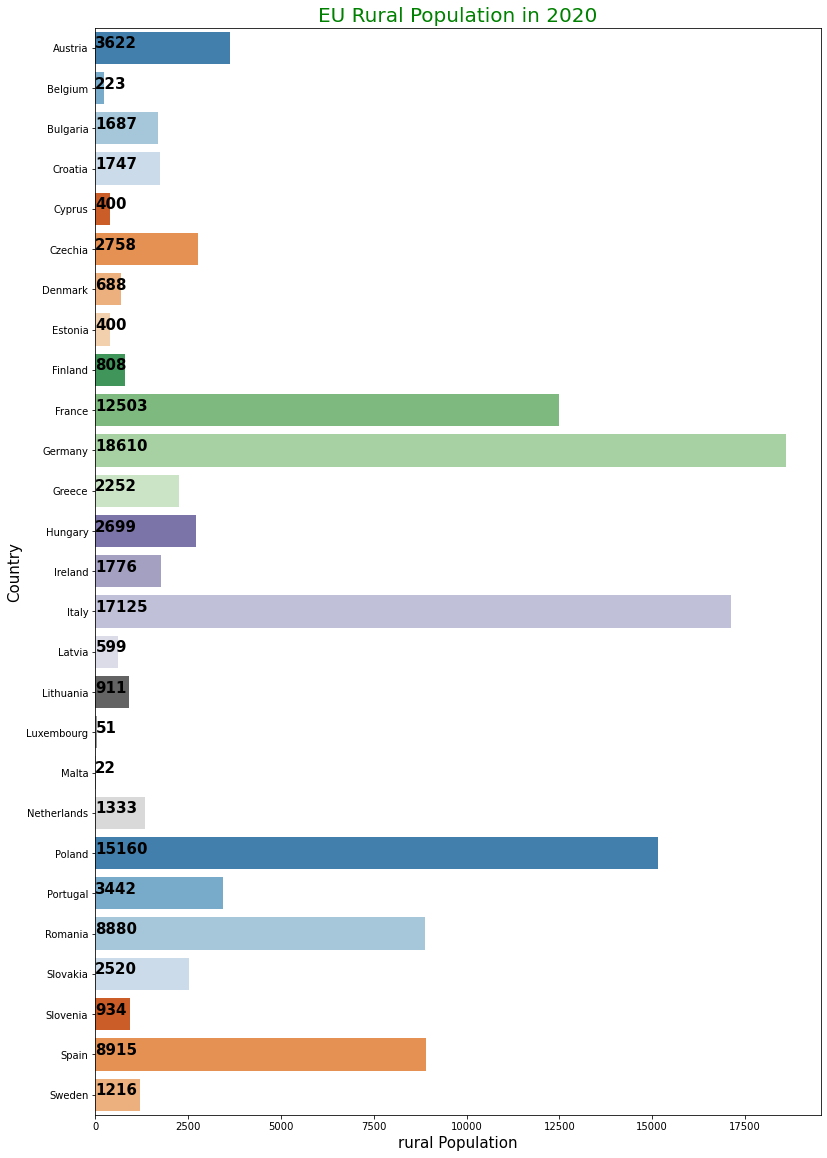

In [14]:
# I'll analyse the year 2020 rural population, and will compare Ireland to other countries

# I need to select the year 
dfeda2020 = dfeda[dfeda['Year'] == 2020]

#  defining here horizontal and vertical plot dimensions
plt.figure(figsize=(13,20))

# using barplot with pallete 'tab20c' to allow to diferenciate countries
ax = sns.barplot(x="rural population", y="Country",
                 data=dfeda2020, palette="tab20c",
                 linewidth = 1)

# using labels in each bar with color black to highlight numbers
for i,j in enumerate(dfeda2020["rural population"]):
    ax.text(.5, i, j, weight="bold", color = 'black', fontsize =15)
    
# plot the dataframe with title, using size 20, using green color    
plt.title("EU Rural Population in 2020",fontsize = 20, color = 'green')

# Define labels and size 15 to visualize 
ax.set_xlabel(xlabel = 'rural Population', fontsize = 15)
ax.set_ylabel(ylabel = 'Country', fontsize = 15)
plt.show()

Comments: as we can see there are more people living on agriculture in germany (18,610), followed by Italy (17,125) compared to ireland (1,776), a reason can be the size of the country as Ireland is still a small country in size and people. 

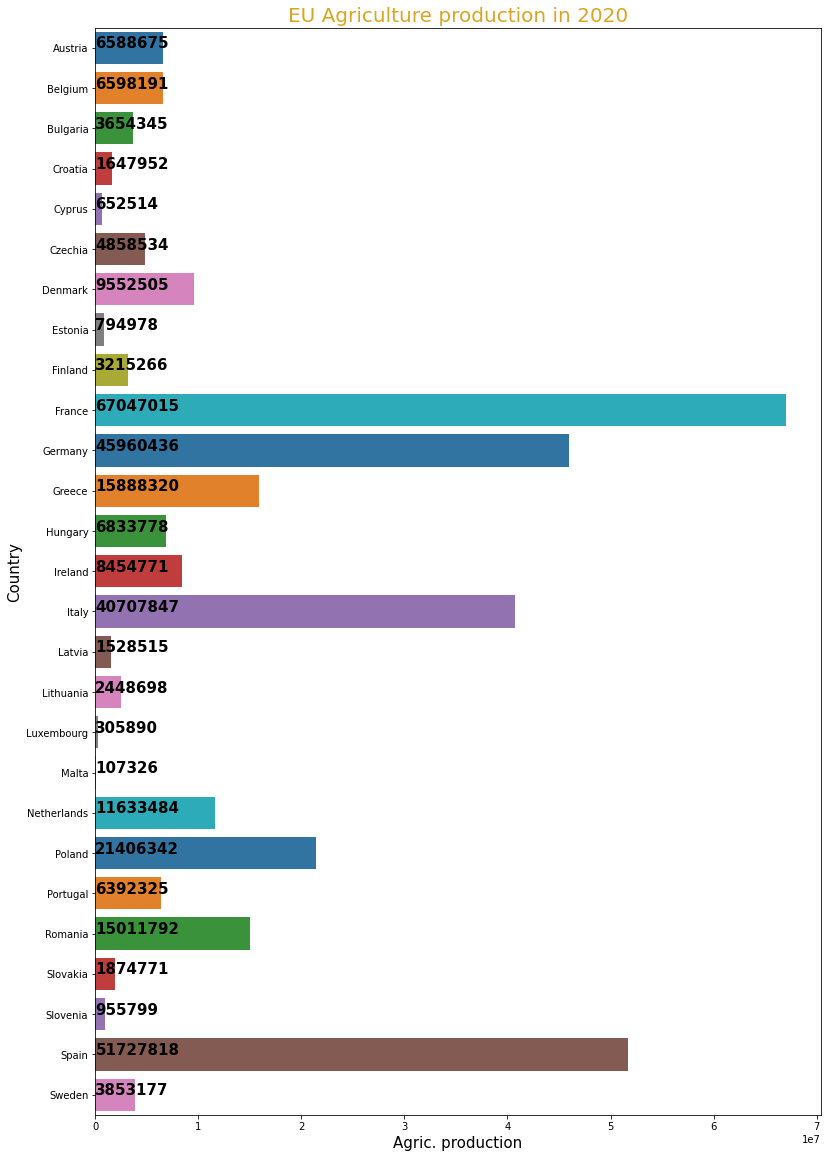

In [15]:
# and now for Agriculture production

#  defining here horizontal and vertical plot dimensions
plt.figure(figsize=(13,20))

# using barplot with pallete 'tab10' to allow to diferenciate countries
ax = sns.barplot(x="Agric. production", y="Country",
                 data=dfeda2020, palette="tab10",
                 linewidth = 1)

# using labels in each bar with color black to highlight numbers
for i,j in enumerate(dfeda2020["Agric. production"]):
    ax.text(.5, i, j, weight="bold", color = 'black', fontsize =15)
    
# plot the dataframe with title, using size 20, using goldenrod color      
plt.title("EU Agriculture production in 2020",fontsize = 20, color = 'goldenrod')

# Define labels and size 15 to visualize 
ax.set_xlabel(xlabel = 'Agric. production', fontsize = 15)
ax.set_ylabel(ylabel = 'Country', fontsize = 15)
plt.show()

Comments: we can see that France a good production, in the first place before germany, with less people working in agriculture. Ireland has a smaller production considering the size of the country againts Countries like France and Germany. 

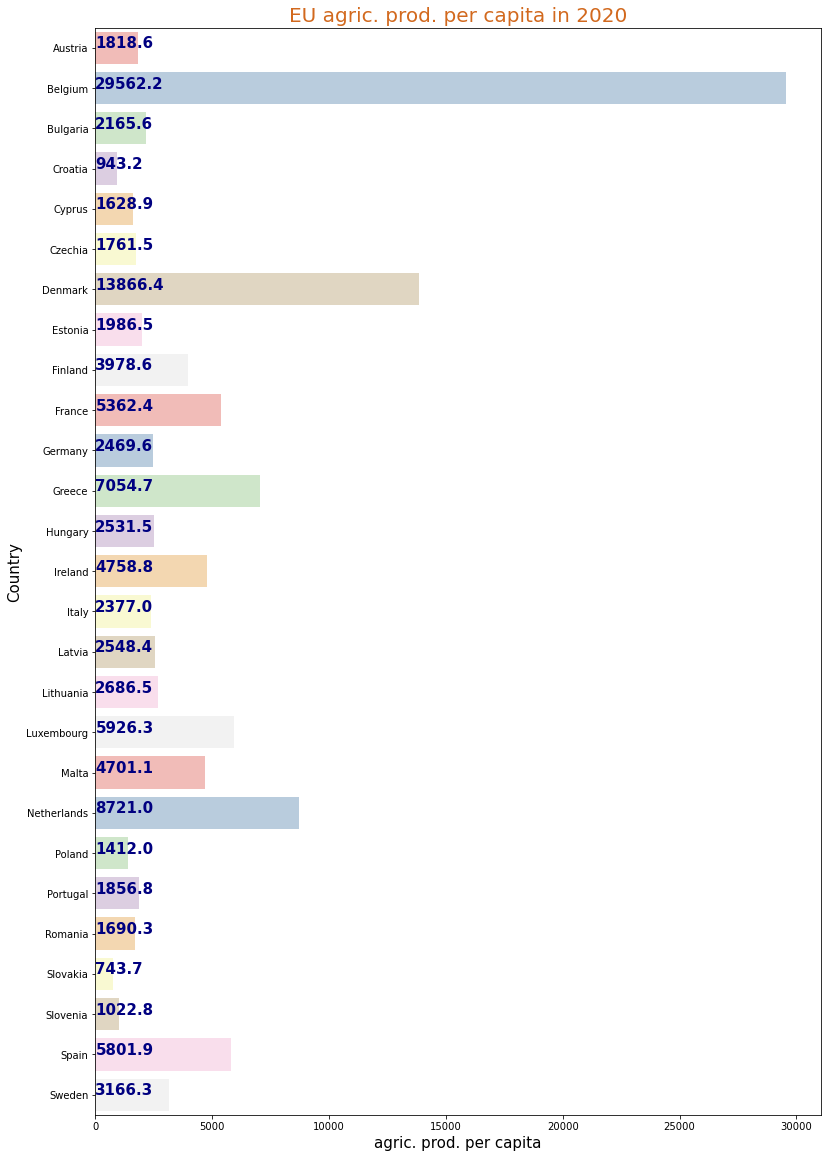

In [16]:
# and now for Agriculture production per capita

#  defining here horizontal and vertical plot dimensions
plt.figure(figsize=(13,20))

# using barplot with pallete 'Pastel1' to allow to diferenciate countries
ax = sns.barplot(x="agric. prod. per capita", y="Country",
                 data=dfeda2020, palette="Pastel1",
                 linewidth = 1)

# using labels in each bar with color navy to highlight numbers
for i,j in enumerate(dfeda2020["agric. prod. per capita"]):
    ax.text(.5, i, j, weight="bold", color = 'navy', fontsize =15)

# plot the dataframe with title, using size 20, using chocolate color 
plt.title("EU agric. prod. per capita in 2020", fontsize = 20, color = 'chocolate')

# Define labels and size 15 to visualize 
ax.set_xlabel(xlabel = 'agric. prod. per capita', fontsize = 15)
ax.set_ylabel(ylabel = 'Country', fontsize = 15)
plt.show()

Comments: as we can see a person who live from Agriculture has a productivity at the highest in Belgium (29,582 usd), followed by denmark (13,866 usd) compared to ireland (4,758 Usd), showing that Ireland needs to improve its capacity to compete with other markets, maybe better machines and/or improve production processes. 

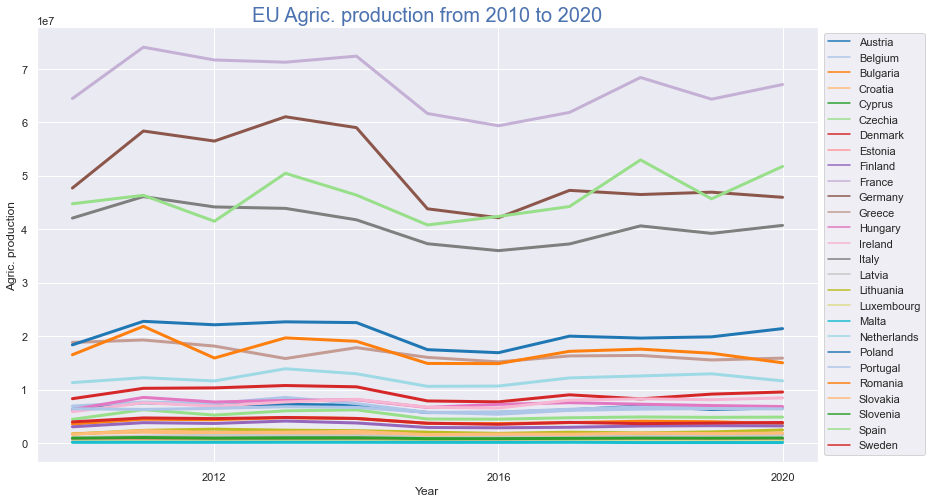

In [17]:
# with a time line I can check  evolution for agriculture items 
# in every country and relation between those countries

# import tiker from library to plot our data

import matplotlib.ticker as ticker

# Adding a grid (dark) in seaborn to better visualize lines and set the size 
sns.set_style('darkgrid')
sns.set(rc={'figure.figsize':(14,8)})

# select the lineplot and define variables x,y, index(country) and 
# also color (pallete)
ax = sns.lineplot(data=df,x ='Year', y = 'Agric. production',
                  hue='Country', palette='tab20',
                legend='full', lw=3)

# plot the chart, with label and title
ax.xaxis.set_major_locator(ticker.MultipleLocator(4))
plt.legend(bbox_to_anchor=(1, 1))
plt.ylabel('Agric. production')
plt.xlabel('Year')
plt.title('EU Agric. production from 2010 to 2020',fontsize = 20, color = 'b')
plt.show()

the plot is quite confusing with all those countries, and I'll only compary Ireland to top countries

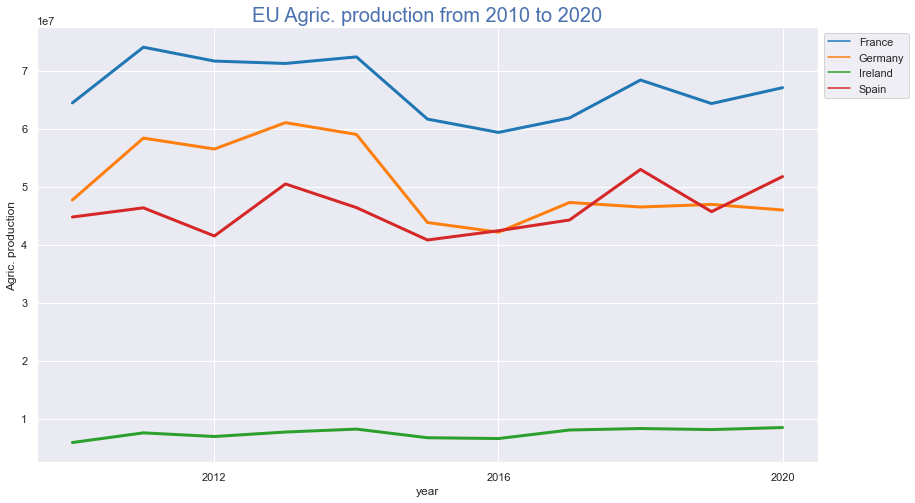

In [18]:
#I Selection of best countries in Agriculture production
dfdv=df

dfdv = dfdv[(dfdv.Country == 'Ireland') |
            (dfdv.Country == 'France') |
            (dfdv.Country == 'Germany') |
            (dfdv.Country == 'Spain')]
                    
ax = sns.lineplot(data=dfdv,x ='Year', y = 'Agric. production',
                hue='Country', palette='tab10',
                legend='full', lw=3)

ax.xaxis.set_major_locator(ticker.MultipleLocator(4))
plt.legend(bbox_to_anchor=(1, 1))
plt.ylabel('Agric. production')
plt.title('EU Agric. production from 2010 to 2020',fontsize = 20, color = 'b')
plt.xlabel('year')
plt.show()

Comments: the evolution of Agriculture production in EU, with France (blue), followed by Spain (red) and Germany (orange)
is very consistent with up and downs.
    
Ireland is way below their production, due to the size of the country and maybe agriculturat processes not so productive. 
Ireland Production is also linear, not improving a lot. 

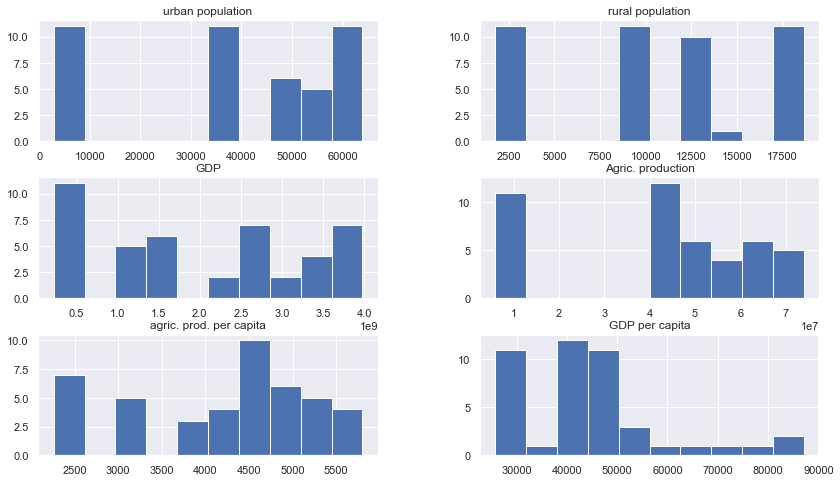

In [19]:
# Use plots to visualise our data except year

dfdv.drop(['Year'],1).hist()
plt.show()

# OUTLIERS

now I check for outliers using Inter Quartile Range and plots, it will allow to see values outside normal distribution and correct dataset if necessary

# BOX PLOTS

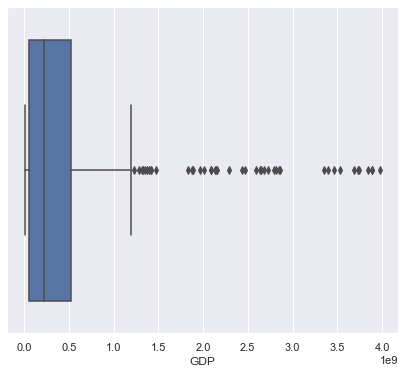

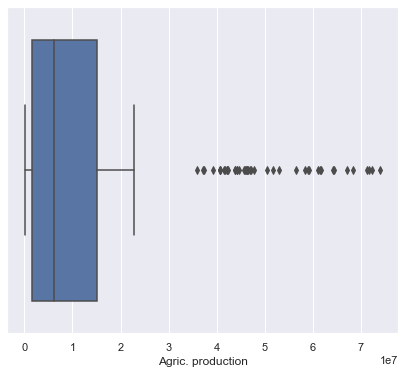

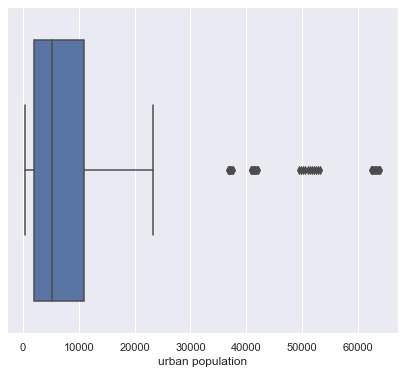

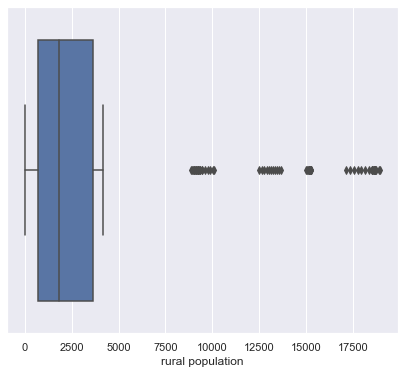

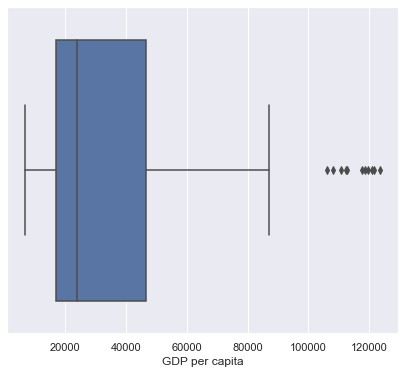

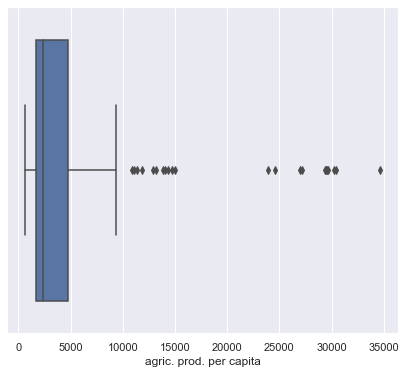

In [30]:
# using copy of the dataframe to avoid changes from original one
dfeda = dfeda.copy()

# select only numerical values
dfeda = dfeda.select_dtypes(include=["float64","int64"])

# I check all columns 
column_list = ["GDP","Agric. production","urban population","rural population","GDP per capita","agric. prod. per capita"]

# Plot Dimensions width=7, height=6
sns.set(rc={"figure.figsize":(7, 6)}) 

# plot all columns
for col in column_list:
     sns.boxplot(x = df[col])
     plt.xlabel(col)
     plt.show()
    


Comments: i can see that all columns have ouliers represented by plots outside the boxplot

In [31]:
# using IPython library i can import the image of some highlighted outliers

img = 'outliers_boxplot.png'
Image(url=img)

# INTER QUARTILE RANGE

In [32]:
# for GDP

# create a table
df_table = df["GDP"]

# calculate in the table quartile 1 and 3 to obtain interquartile range
Q1 = df_table.quantile(0.25)
Q3 = df_table.quantile(0.75)
IQR = Q3 - Q1

# Now I need to define the outlier base value above and below datasets 
# normal range (Upper and Lower bounds), to check values outside that base (outliers) 
# I'll consider 50% more or less (as 1,5 * IQR value is considered normal, 
# and the rest anormal (outlier))
lower_bound = Q1 - 1.5*IQR
upper_bound = Q3 + 1.5*IQR

# showing now the results, and values outside those lower and upper bounds are outliers 
print("lower bound is " + str(lower_bound))
print("upper bound is " + str(upper_bound))
print("Q1: ", Q1)
print("Q3: ", Q3)

lower bound is -641096677.8999999
upper bound is 1219286349.7799997
Q1:  56546957.48
Q3:  521642714.4


Comments: outliers are above upper bound of 1219286.0, because in the boxplot, we can see clearly there are above the plot.

In [33]:
# for GDP per capita

# create a table
df_table = df["GDP per capita"]

# calculate in the table quartile 1 and 3 to obtain interquartile range
Q1 = df_table.quantile(0.25)
Q3 = df_table.quantile(0.75)
IQR = Q3 - Q1

# Now I need to define the outlier base value above and below datasets 
# normal range (Upper and Lower bounds), to check values outside that base (outliers) 
# I'll consider 50% more or less (as 1,5 * IQR value is considered normal, 
# and the rest anormal (outlier))
lower_bound = Q1 - 1.5*IQR
upper_bound = Q3 + 1.5*IQR

# showing now the results, and values outside those lower and upper bounds are outliers 
print("lower bound is " + str(lower_bound))
print("upper bound is " + str(upper_bound))
print("Q1: ", Q1)
print("Q3: ", Q3)

lower bound is -27825.950000000008
upper bound is 91540.05000000002
Q1:  16936.3
Q3:  46777.8


Comments: outliers are above upper bound of 91.0, because in the boxplot, we can see clearly there are above the plot.

In [34]:
# for Agric. production

# create a table
df_table = df["Agric. production"]

# calculate in the table quartile 1 and 3 to obtain interquartile range
Q1 = df_table.quantile(0.25)
Q3 = df_table.quantile(0.75)
IQR = Q3 - Q1

# Now I need to define the outlier base value above and below datasets 
# normal range (Upper and Lower bounds), to check values outside that base (outliers) 
# I'll consider 50% more or less (as 1,5 * IQR value is considered normal, 
# and the rest anormal (outlier))
lower_bound = Q1 - 1.5*IQR
upper_bound = Q3 + 1.5*IQR

# showing now the results, and values outside those lower and upper bounds are outliers 
print("lower bound is " + str(lower_bound))
print("upper bound is " + str(upper_bound))
print("Q1: ", Q1)
print("Q3: ", Q3)

lower bound is -18397808.0
upper bound is 35057552.0
Q1:  1647952.0
Q3:  15011792.0


Comments: outliers are above upper bound of 3505755, because in the boxplot, we can see clearly there are above the plot.

In [35]:
# for agric. prod. per capita

# create a table
df_table = df["agric. prod. per capita"]

# calculate in the table quartile 1 and 3 to obtain interquartile range
Q1 = df_table.quantile(0.25)
Q3 = df_table.quantile(0.75)
IQR = Q3 - Q1

# Now I need to define the outlier base value above and below datasets 
# normal range (Upper and Lower bounds), to check values outside that base (outliers) 
# I'll consider 50% more or less (as 1,5 * IQR value is considered normal, 
# and the rest anormal (outlier))
lower_bound = Q1 - 1.5*IQR
upper_bound = Q3 + 1.5*IQR

# showing now the results, and values outside those lower and upper bounds are outliers 
print("lower bound is " + str(lower_bound))
print("upper bound is " + str(upper_bound))
print("Q1: ", Q1)
print("Q3: ", Q3)

lower bound is -2825.4500000000007
upper bound is 9319.75
Q1:  1729.0
Q3:  4765.3


Comments: outliers are above upper bound of 9319.0, because in the boxplot, we can see clearly there are above the plot.

In [36]:
# for rural population

# create a table
df_table = df["rural population"]

# calculate in the table quartile 1 and 3 to obtain interquartile range
Q1 = df_table.quantile(0.25)
Q3 = df_table.quantile(0.75)
IQR = Q3 - Q1

# Now I need to define the outlier base value above and below datasets 
# normal range (Upper and Lower bounds), to check values outside that base (outliers) 
# I'll consider 50% more or less (as 1,5 * IQR value is considered normal, 
# and the rest anormal (outlier))
lower_bound = Q1 - 1.5*IQR
upper_bound = Q3 + 1.5*IQR

# showing now the results, and values outside those lower and upper bounds are outliers 
print("lower bound is " + str(lower_bound))
print("upper bound is " + str(upper_bound))
print("Q1: ", Q1)
print("Q3: ", Q3)

lower bound is -3698.0
upper bound is 8086.0
Q1:  721.0
Q3:  3667.0


Comments: outliers are above upper bound of 8086.0, because in the boxplot, we can see clearly there are above the plot.

In [37]:
# for urban population

# create a table
df_table = df["urban population"]

# calculate in the table quartile 1 and 3 to obtain interquartile range
Q1 = df_table.quantile(0.25)
Q3 = df_table.quantile(0.75)
IQR = Q3 - Q1

# Now I need to define the outlier base value above and below datasets 
# normal range (Upper and Lower bounds), to check values outside that base (outliers) 
# I'll consider 50% more or less (as 1,5 * IQR value is considered normal, 
# and the rest anormal (outlier))
lower_bound = Q1 - 1.5*IQR
upper_bound = Q3 + 1.5*IQR

# showing now the results, and values outside those lower and upper bounds are outliers 
print("lower bound is " + str(lower_bound))
print("upper bound is " + str(upper_bound))
print("Q1: ", Q1)
print("Q3: ", Q3)

lower bound is -11350.0
upper bound is 24330.0
Q1:  2030.0
Q3:  10950.0


Comments: outliers are above upper bound of 24330.0, because in the boxplot, we can see clearly there are above the plot.

DEALING WITH OULIERS

Now that I know where are the ouliers, I can delete them using IQR and function drop, 
However when I did a lot of information was deleted, my plots comparing Ireland with other EU countries were wrong and inconsistants (some countries not showing values during several year), so I decided to not delete outliers for that reason.

# EDA BIVARIATE ANALYSIS

through this analysis, I'll understand how variables are related to each other and the relationship between dependent and independent variables present in the dataset.
For Numerical variables, Pair plots are the best plots 

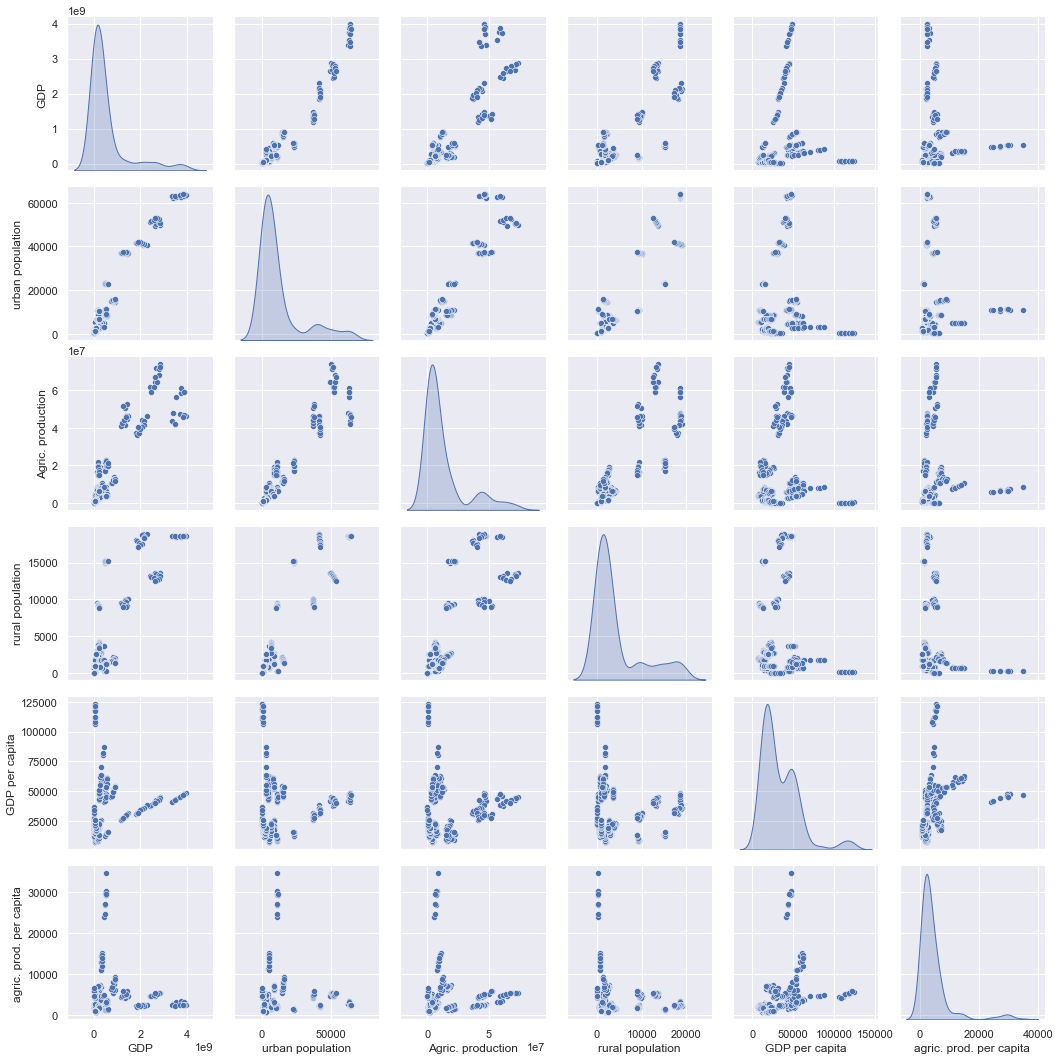

In [38]:
# for the numerical values of my dataset I use Seaborn Pairplot to relate two variables

sns.pairplot(df[['GDP', 'urban population', 'Agric. production', 'rural population','GDP per capita','agric. prod. per capita']], diag_kind="kde")


Comments: 
- Between gdp and other variables don't have a very linear relationship, most linear to urban population

- Between Urban population and the other variables don't have a very good linear relationship, as the values seem very disperse in the plot, however with more concentrated values in some areas.

- Between Agric. production, rural population, gpd per capita, agric. prod. per capita and the other vaiables don't have a very good linear relationship, as the values seem very disperse in the plot. however the two variables per capital seems to have an area of relationship

In all the plots, the data seems disperse, having some few areas with cencentrated values and relationships

# EDA Multivariate Analysis

with this analise I look at more than two variables, to determine relationships and analyze patterns for any dataset

In [39]:
# here I can check relations for the multiple numerical values in my dataset, 
# using a correlation function

df.corr()

,Year,urban population,rural population,GDP,Agric. production,agric. prod. per capita,GDP per capita
Year,1.000000,0.007799,-0.016686,0.005757,-0.021695,0.002781,0.042488
urban population,0.007799,1.000000,0.893242,0.967339,0.949278,0.016354,0.057688
rural population,-0.016686,0.893242,1.000000,0.815043,0.843083,-0.192919,-0.096965
GDP,0.005757,0.967339,0.815043,1.000000,0.899431,0.038230,0.179428
Agric. production,-0.021695,0.949278,0.843083,0.899431,1.000000,0.017927,0.045652
agric. prod. per capita,0.002781,0.016354,-0.192919,0.038230,0.017927,1.000000,0.314720
GDP per capita,0.042488,0.057688,-0.096965,0.179428,0.045652,0.314720,1.000000


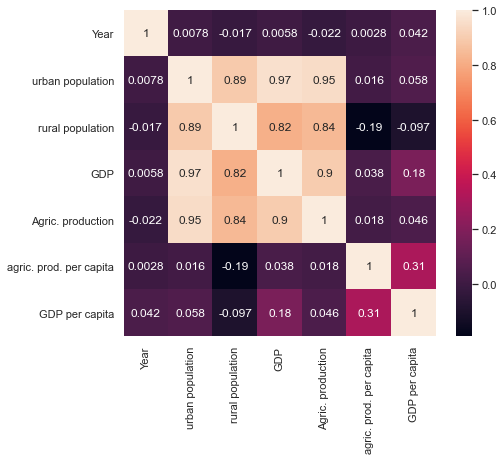

In [40]:
# for a better analyse of correlation I add color using a heatmap

sns.heatmap(df.corr(),annot=True)
plt.show()

Comments: the higher the correlation, the better relation between two variables
I'm not considering 1 (100% correlation) for the same variable. 
we can see that most correlation are positive, so the variables relates in the same way.

the urban population and Agri. prod. is 0.95 and also GDP (0.97), meaning positive and strong correlation between them, as urban population growth will generate more production and also more GDP.

Rural population and Agri. prod is 0.84 and also urban population 0.89 are a positive and medium relationship. rural population growth will generate more Agric. production, and seems also going the same way as urban population. 

GDP and urban population are strongly related 0.97 or with Agric. prod. (0.90), as the growth in population with generate more production of good and services to countries' GDP


# EDA - missing values

I need to check if there any missing values (NaN or blank), and if so, to impute missing values to my dataset, by their Mean, median for example

In [41]:
# check how many null values in the dataset

df.isnull().sum()

Country                    0
Year                       0
urban population           0
rural population           0
GDP                        0
Agric. production          0
agric. prod. per capita    0
GDP per capita             0
dtype: int64

comments: as confirmed previously on df.info(), there're no null values

# STATISTICS

In [36]:
# define dataframe for statistical values
dfstat=df
dfstat

,Country,Year,urban population,rural population,GDP,Agric. production,agric. prod. per capita,GDP per capita
0,Austria,2010,4827,3582,391892746.5,6345092,1771.0,46598.7
1,Austria,2011,4831,3628,431120310.1,7548229,2080.5,50960.7
2,Austria,2012,4867,3650,409425234.2,7135291,1954.9,48068.4
3,Austria,2013,4918,3659,430068713.0,7234620,1976.9,50137.5
4,Austria,2014,4966,3666,441996131.7,7101967,1936.8,51197.1
...,...,...,...,...,...,...,...,...
292,Sweden,2016,8544,1293,515654671.5,3509592,2713.5,52417.1
293,Sweden,2017,8636,1273,541018749.8,3868306,3036.5,54589.4
294,Sweden,2018,8727,1254,555455371.5,3638770,2900.1,55641.7
295,Sweden,2019,8817,1235,533879529.2,3742851,3028.9,53105.8


Descriptive Statistics
some have been used in EDA above, like describe function, Histograms, barplots, lineplots, and box plots, so I'll not explaining them again

In [37]:
# this section have been explained in EDA, but will show describe here
dfstat.describe()

,Year,urban population,rural population,GDP,Agric. production,agric. prod. per capita,GDP per capita
count,297.000000,297.000000,297.000000,2.970000e+02,2.970000e+02,297.000000,297.000000
mean,2015.000000,12101.942761,4274.107744,5.556035e+08,1.263423e+07,4327.782828,33357.048822
std,3.167615,16339.844351,5556.179084,8.786215e+08,1.741747e+07,5490.457235,23139.047337
min,2010.000000,391.000000,22.000000,9.027012e+06,1.040590e+05,629.100000,6844.700000
25%,2012.000000,2030.000000,721.000000,5.654696e+07,1.647952e+06,1729.000000,16936.300000
50%,2015.000000,5310.000000,1830.000000,2.263695e+08,6.115363e+06,2371.200000,23811.700000
75%,2018.000000,10950.000000,3667.000000,5.216427e+08,1.501179e+07,4765.300000,46777.800000
max,2020.000000,63930.000000,18918.000000,3.977289e+09,7.403010e+07,34630.200000,123514.900000


inferential statistics and visualisations

In [38]:
# Importing libraries for statistics

import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import scipy.stats as stats
from statsmodels.stats import weightstats

in the plot "EU agric. prod. per capita in 2020" above I did compare some countries and some productivity similar to Ireland.
- Ireland 4758 
- Finland 3978
- France 5362

So will compare those countries and use several statistical tests to compare them

In [39]:
print('-------------- CORRELATION TESTS --------------')

# Pearson’s Correlation Coefficient
from scipy.stats import pearsonr

data1 = dfstat.query('Country == "Ireland"')['GDP per capita']
data2 = dfstat.query('Country == "Ireland"')['agric. prod. per capita']

data4 = dfstat.query('Country == "France"')['GDP per capita']
data5 = dfstat.query('Country == "France"')['agric. prod. per capita']

data7 = dfstat.query('Country == "Finland"')['GDP per capita']
data8 = dfstat.query('Country == "Finland"')['agric. prod. per capita']

print('~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~')
print('Pearson test')
print('~~~~~ Ireland ~~~~~')
stat, p1 = pearsonr(data1, data2)
print('stat=%.3f, p=%.3f' % (stat, p1))
if p1 > 0.05:
 print('Probably independent')
else:
 print('Probably dependent')

print('~~~~~ France ~~~~~')
stat, p2 = pearsonr(data4, data5) 
print('stat=%.3f, p=%.3f' % (stat, p2))
if p2 > 0.05:
 print('Probably independent')
else:
 print('Probably dependent')

print('~~~~~ Finland ~~~~~')
stat, p3 = pearsonr(data7, data8) 
print('stat=%.3f, p=%.3f' % (stat, p3))
if p3 > 0.05:
 print('Probably independent')
else:
 print('Probably dependent')

print('~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~')
print('Spearman test')

# Spearman’s Rank Correlation
from scipy.stats import spearmanr

data1 = dfstat.query('Country == "Ireland"')['GDP per capita']
data2 = dfstat.query('Country == "Ireland"')['agric. prod. per capita']

data4 = dfstat.query('Country == "France"')['GDP per capita']
data5 = dfstat.query('Country == "France"')['agric. prod. per capita']

data7 = dfstat.query('Country == "Finland"')['GDP per capita']
data89 = dfstat.query('Country == "Finland"')['agric. prod. per capita']

print('~~~~~ Ireland ~~~~~')
stat, p1 = spearmanr(data1, data2)
print('stat=%.3f, p=%.3f' % (stat, p1))

if p1 > 0.05:
 print('Probably independent')
else:
 print('Probably dependent')

print('~~~~~ France ~~~~~')
stat, p2 = spearmanr(data4, data5)
print('stat=%.3f, p=%.3f' % (stat, p2))

if p2 > 0.05:
 print('Probably independent')
else:
 print('Probably dependent')

print('~~~~~ Finland ~~~~~')
stat, p3 = spearmanr(data7, data8)
print('stat=%.3f, p=%.3f' % (stat, p3))

if p3 > 0.05:
 print('Probably independent')
else:
 print('Probably dependent')

print('~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~')

#Kendall’s Rank Correlation
from scipy.stats import kendalltau

data1 = dfstat.query('Country == "Ireland"')['GDP per capita']
data2 = dfstat.query('Country == "Ireland"')['agric. prod. per capita']

data4 = dfstat.query('Country == "France"')['GDP per capita']
data5 = dfstat.query('Country == "France"')['agric. prod. per capita']

data7 = dfstat.query('Country == "Finland"')['GDP per capita']
data8 = dfstat.query('Country == "Finland"')['agric. prod. per capita']

print('Kendall test')
print('~~~~~ Ireland ~~~~~')
stat, p1 = kendalltau(data1, data2)
print('stat=%.3f, p=%.3f' % (stat, p1))

if p1 > 0.05:
 print('Probably independent')
else:
 print('Probably dependent')

print('~~~~~ France ~~~~~')
stat, p2 = kendalltau(data4, data4)
print('stat=%.3f, p=%.3f' % (stat, p2))

if p2 > 0.05:
 print('Probably independent')
else:
 print('Probably dependent')

print('~~~~~ Finland ~~~~~')
stat, p3 = kendalltau(data7, data8)
print('stat=%.3f, p=%.3f' % (stat, p3))

if p3 > 0.05:
 print('Probably independent')
else:
 print('Probably dependent')

print('~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~')

#Chi-Squared Test

from scipy.stats import chi2_contingency

print('Chi-Squared test')
data1 = dfstat.query('Country == "Ireland"')['GDP per capita']
data2 = dfstat.query('Country == "Ireland"')['agric. prod. per capita']

data4 = dfstat.query('Country == "France"')['GDP per capita']
data5 = dfstat.query('Country == "France"')['agric. prod. per capita']

data7 = dfstat.query('Country == "Finland"')['GDP per capita']
data8 = dfstat.query('Country == "Finland"')['agric. prod. per capita']

table1 = data1,data2
table2 = data4,data5
table3 = data7,data8

print('~~~~~ Ireland ~~~~~')
stat,p1, dof, expected = chi2_contingency(table1)
print('stat=%.3f, p=%.3f' % (stat, p1))
if p1 > 0.05:
 print('Probably independent')
else:
 print('Probably dependent')

print('~~~~~ France ~~~~~')
stat,p2, dof, expected = chi2_contingency(table2)
print('stat=%.3f, p=%.3f' % (stat, p2))
if p2 > 0.05:
 print('Probably independent')
else:
 print('Probably dependent')

print('~~~~~ Finland ~~~~~')
stat,p3, dof, expected = chi2_contingency(table3)
print('stat=%.3f, p=%.3f' % (stat, p3))
if p3 > 0.05:
 print('Probably independent')
else:
 print('Probably dependent')


print('~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~')

print('--- PARAMETRIC STATISTICAL HYPOTHESIS TESTS ---')
print('~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~')
#Student’s t-test

from scipy.stats import ttest_ind
data1 = dfstat.query('Country == "Ireland"')['GDP per capita']
data2 = dfstat.query('Country == "Ireland"')['agric. prod. per capita']

data4 = dfstat.query('Country == "France"')['GDP per capita']
data5 = dfstat.query('Country == "France"')['agric. prod. per capita']

data7 = dfstat.query('Country == "Finland"')['GDP per capita']
data8 = dfstat.query('Country == "Finland"')['agric. prod. per capita']

print('Student t test Ireland')
print('~~~~~ Ireland ~~~~~')

stat, p1 = ttest_ind(data1, data2)
print('stat=%.3f, p=%.3f' % (stat, p1))
if p1 > 0.05:
 print('Probably the same distribution')
else:
 print('Probably different distributions')

print('~~~~~ France ~~~~~')
stat, p2 = ttest_ind(data4, data5)
print('stat=%.3f, p=%.3f' % (stat, p2))
if p2 > 0.05:
 print('Probably the same distribution')
else:
 print('Probably different distributions')

print('~~~~~ Finland ~~~~~')
stat, p3 = ttest_ind(data7, data8)
print('stat=%.3f, p=%.3f' % (stat, p3))
if p3 > 0.05:
 print('Probably the same distribution')
else:
 print('Probably different distributions')

print('~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~')

#Paired Student’s t-test

from scipy.stats import ttest_rel
data1 = dfstat.query('Country == "Ireland"')['GDP per capita']
data2 = dfstat.query('Country == "Ireland"')['agric. prod. per capita']

data4 = dfstat.query('Country == "France"')['GDP per capita']
data5 = dfstat.query('Country == "France"')['agric. prod. per capita']

data7 = dfstat.query('Country == "Finland"')['GDP per capita']
data8 = dfstat.query('Country == "Finland"')['agric. prod. per capita']

print('Paired Student t test')
print('~~~~~ Ireland ~~~~~')
stat, p1 = ttest_rel(data1, data2)
print('stat=%.3f, p=%.3f' % (stat, p1))
if p1 > 0.05:
 print('Probably the same distribution')
else:
 print('Probably different distributions')

print('~~~~~ France ~~~~~')
stat, p2 = ttest_rel(data4, data5)
print('stat=%.3f, p=%.3f' % (stat, p2))
if p2 > 0.05:
 print('Probably the same distribution')
else:
 print('Probably different distributions')

print('~~~~~ Finland ~~~~~')
stat, p3 = ttest_rel(data7, data8)
print('stat=%.3f, p=%.3f' % (stat, p3))
if p3 > 0.05:
 print('Probably the same distribution')
else:
 print('Probably different distributions')

print('~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~')

#Analysis of Variance Test (ANOVA)
from scipy.stats import f_oneway
data1 = dfstat.query('Country == "Ireland"')['GDP per capita']
data2 = dfstat.query('Country == "Ireland"')['agric. prod. per capita']
data3 = dfstat.query('Country == "Ireland"')['rural population']

data4 = dfstat.query('Country == "France"')['GDP per capita']
data5 = dfstat.query('Country == "France"')['agric. prod. per capita']
data6 = dfstat.query('Country == "Ireland"')['rural population']

data7 = dfstat.query('Country == "Finland"')['GDP per capita']
data8 = dfstat.query('Country == "Finland"')['agric. prod. per capita']
data9 = dfstat.query('Country == "Ireland"')['rural population']

print('~~~~~ Ireland ~~~~~')
print('Analysis of Variance test')
stat, p1 = f_oneway(data1, data2, data3)
print('stat=%.3f, p=%.3f' % (stat, p1))
if p1 > 0.05:
 print('Probably the same distribution')
else:
 print('Probably different distributions')

print('~~~~~ France ~~~~~')
stat, p2 = f_oneway(data4, data5, data6)
print('stat=%.3f, p=%.3f' % (stat, p2))
if p2 > 0.05:
 print('Probably the same distribution')
else:
 print('Probably different distributions')

print('~~~~~ Finland ~~~~~')
stat, p3 = f_oneway(data7, data8, data9)
print('stat=%.3f, p=%.3f' % (stat, p3))
if p3 > 0.05:
 print('Probably the same distribution')
else:
 print('Probably different distributions')

print('~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~')

#Repeated Measures ANOVA Test

print('-- NONPARAMETRIC STATISTICAL HYPOTHESIS TESTS --')
print('~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~')
# Mann-Whitney U Test
from scipy.stats import mannwhitneyu
data1 = dfstat.query('Country == "Ireland"')['GDP per capita']
data2 = dfstat.query('Country == "Ireland"')['agric. prod. per capita']

data4 = dfstat.query('Country == "France"')['GDP per capita']
data5 = dfstat.query('Country == "France"')['agric. prod. per capita']

data7 = dfstat.query('Country == "Finland"')['GDP per capita']
data8 = dfstat.query('Country == "Finland"')['agric. prod. per capita']

print('Mann-Whitney U test')
print('~~~~~ Ireland ~~~~~')

stat, p1 = mannwhitneyu(data1, data2)
print('stat=%.3f, p=%.3f' % (stat, p1))
if p1 > 0.05:
 print('Probably the same distribution')
else:
 print('Probably different distributions')

print('~~~~~ France ~~~~~')
stat, p2 = mannwhitneyu(data4, data5)
print('stat=%.3f, p=%.3f' % (stat, p2))
if p2 > 0.05:
 print('Probably the same distribution')
else:
 print('Probably different distributions')

print('~~~~~ Finland ~~~~~')
stat, p3 = mannwhitneyu(data7, data8)
print('stat=%.3f, p=%.3f' % (stat, p3))
if p3 > 0.05:
 print('Probably the same distribution')
else:
 print('Probably different distributions')

print('~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~')

#Wilcoxon Signed-Rank Test

from scipy.stats import wilcoxon

data1 = dfstat.query('Country == "Ireland"')['GDP per capita']
data2 = dfstat.query('Country == "Ireland"')['agric. prod. per capita']

data4 = dfstat.query('Country == "France"')['GDP per capita']
data5 = dfstat.query('Country == "France"')['agric. prod. per capita']

data7 = dfstat.query('Country == "Finland"')['GDP per capita']
data8 = dfstat.query('Country == "Finland"')['agric. prod. per capita']

print('Wilcoxon Signed-Rank test')
print('~~~~~ Ireland ~~~~~')

stat, p1 = wilcoxon(data1, data2)
print('stat=%.3f, p=%.3f' % (stat, p1))
if p1 > 0.05:
 print('Probably the same distribution')
else:
 print('Probably different distributions')

print('~~~~~ France ~~~~~')
stat, p2 = wilcoxon(data4, data5)
print('stat=%.3f, p=%.3f' % (stat, p2))
if p2 > 0.05:
 print('Probably the same distribution')
else:
 print('Probably different distributions')

print('~~~~~ Finland ~~~~~')
stat, p3 = wilcoxon(data7, data8)
print('stat=%.3f, p=%.3f' % (stat, p3))
if p3 > 0.05:
 print('Probably the same distribution')
else:
 print('Probably different distributions')

print('~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~')

#Kruskal-Wallis H Test

from scipy.stats import kruskal
data1 = dfstat.query('Country == "Ireland"')['GDP per capita']
data2 = dfstat.query('Country == "Ireland"')['agric. prod. per capita']

data4 = dfstat.query('Country == "France"')['GDP per capita']
data5 = dfstat.query('Country == "France"')['agric. prod. per capita']

data7 = dfstat.query('Country == "Finland"')['GDP per capita']
data8 = dfstat.query('Country == "Finland"')['agric. prod. per capita']

print('Kruskal-Wallis H test')
print('~~~~~ Ireland ~~~~~')

stat, p1 = kruskal(data1, data2)
print('stat=%.3f, p=%.3f' % (stat, p1))
if p1 > 0.05:
 print('Probably the same distribution')
else:
 print('Probably different distributions')

print('~~~~~ France ~~~~~')
stat, p2 = kruskal(data4, data5)
print('stat=%.3f, p=%.3f' % (stat, p2))
if p2 > 0.05:
 print('Probably the same distribution')
else:
 print('Probably different distributions')

print('~~~~~ Finland ~~~~~')
stat, p3 = kruskal(data7, data8)
print('stat=%.3f, p=%.3f' % (stat, p3))
if p3 > 0.05:
 print('Probably the same distribution')
else:
 print('Probably different distributions')

print('~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~')

#Friedman Test
from scipy.stats import friedmanchisquare
data1 = dfstat.query('Country == "Ireland"')['GDP per capita']
data2 = dfstat.query('Country == "Ireland"')['agric. prod. per capita']
data3 = dfstat.query('Country == "Ireland"')['rural population']

data4 = dfstat.query('Country == "France"')['GDP per capita']
data5 = dfstat.query('Country == "France"')['agric. prod. per capita']
data6 = dfstat.query('Country == "Ireland"')['rural population']

data7 = dfstat.query('Country == "Finland"')['GDP per capita']
data8 = dfstat.query('Country == "Finland"')['agric. prod. per capita']
data9 = dfstat.query('Country == "Ireland"')['rural population']

print('Friedman test')
print('~~~~~ Ireland ~~~~~')
stat, p1 = friedmanchisquare(data1, data2, data3)
print('stat=%.3f, p=%.3f' % (stat, p1))
if p1 > 0.05:
 print('Probably the same distribution')
else:
 print('Probably different distributions')

print('~~~~~ France ~~~~~')
stat, p2 = friedmanchisquare(data4, data5, data6)
print('stat=%.3f, p=%.3f' % (stat, p2))
if p2 > 0.05:
 print('Probably the same distribution')
else:
 print('Probably different distributions')

print('~~~~~ Finland ~~~~~')
stat, p3 = friedmanchisquare(data7, data8, data9)
print('stat=%.3f, p=%.3f' % (stat, p3))
if p3 > 0.05:
 print('Probably the same distribution')
else:
 print('Probably different distributions')

print('~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~')

-------------- CORRELATION TESTS --------------
~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~
Pearson test
~~~~~ Ireland ~~~~~
stat=0.642, p=0.033
Probably dependent
~~~~~ France ~~~~~
stat=0.791, p=0.004
Probably dependent
~~~~~ Finland ~~~~~
stat=0.755, p=0.007
Probably dependent
~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~
Spearman test
~~~~~ Ireland ~~~~~
stat=0.682, p=0.021
Probably dependent
~~~~~ France ~~~~~
stat=0.800, p=0.003
Probably dependent
~~~~~ Finland ~~~~~
stat=0.809, p=0.003
Probably dependent
~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~
Kendall test
~~~~~ Ireland ~~~~~
stat=0.527, p=0.026
Probably dependent
~~~~~ France ~~~~~
stat=1.000, p=0.000
Probably dependent
~~~~~ Finland ~~~~~
stat=0.527, p=0.026
Probably dependent
~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~
Chi-Squared test
~~~~~ Ireland ~~~~~
stat=1271.345, p=0.000
Probably dependent
~~~~~ France ~~~~~
stat=80.281, p=0.000
Probably dependent
~~~~~ Finland ~~~~~
stat=325.753, p=0.000
Prob

# ANOVA 

In [40]:
dfstat.head()

,Country,Year,urban population,rural population,GDP,Agric. production,agric. prod. per capita,GDP per capita
0,Austria,2010,4827,3582,391892746.5,6345092,1771.0,46598.7
1,Austria,2011,4831,3628,431120310.1,7548229,2080.5,50960.7
2,Austria,2012,4867,3650,409425234.2,7135291,1954.9,48068.4
3,Austria,2013,4918,3659,430068713.0,7234620,1976.9,50137.5
4,Austria,2014,4966,3666,441996131.7,7101967,1936.8,51197.1


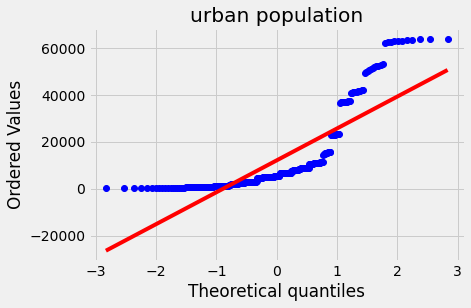

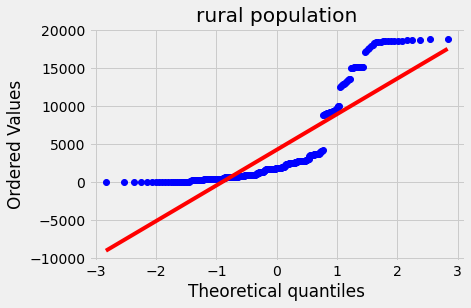

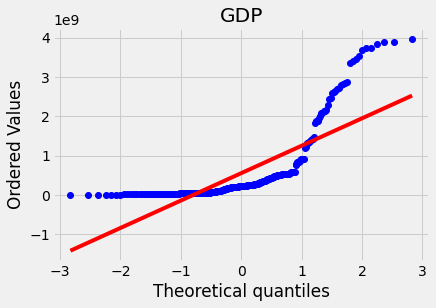

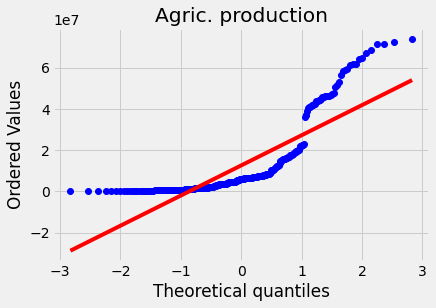

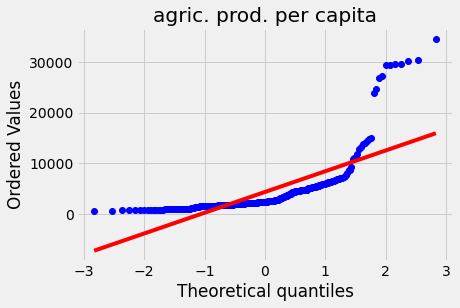

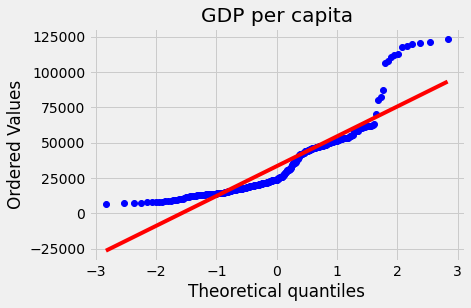

In [41]:
import numpy as np 
import scipy.stats as stats
import matplotlib.pyplot as plt

stats.probplot(dfstat['urban population'], dist="norm" ,plot=plt);plt.title("urban population");plt.show()
stats.probplot(dfstat['rural population'], dist="norm" ,plot=plt);plt.title("rural population");plt.show()
stats.probplot(dfstat['GDP'], dist="norm" ,plot=plt);plt.title("GDP");plt.show()
stats.probplot(dfstat['Agric. production'], dist="norm" ,plot=plt);plt.title("Agric. production");plt.show()
stats.probplot(dfstat['agric. prod. per capita'], dist="norm" ,plot=plt);plt.title("agric. prod. per capita");plt.show()
stats.probplot(dfstat['GDP per capita'], dist="norm" ,plot=plt);plt.title("GDP per capita");plt.show()



In [42]:
#Standard deviation

#calculating standard deviation of the dataset
sd = np.std(dfstat["agric. prod. per capita"])

#display output
print("standard deviation of agric. prod. per capita", sd)


standard deviation of agric. prod. per capita 5481.206247830303


In [43]:
##IMPORTING LIBRARIES

import pandas as pd
import statistics as stats
import numpy as np
import matplotlib.pyplot as plt
import statsmodels.api as sm
from statsmodels.formula.api import ols
from scipy import stats
import scipy as scipy
from scipy.stats import levene

In [44]:
# We check with shapiro to test normality sample

# shapiro() function is the best to Conduct a Shapiro-Wilk test 
#(from the scipy.stats library)  

# import useful library

from scipy.stats import shapiro 

In [45]:
# conduct the  Shapiro-Wilk Test with sample (Country)

print('Ireland')
shapiro(dfstat["agric. prod. per capita"][dfstat.Country == 'Ireland'])

Ireland


ShapiroResult(statistic=0.9056305885314941, pvalue=0.21630166471004486)

In [46]:
print('France')
shapiro(dfstat["agric. prod. per capita"][dfstat.Country == 'France'])

France


ShapiroResult(statistic=0.8422925472259521, pvalue=0.033841900527477264)

In [47]:
print('Finland')
shapiro(dfstat["agric. prod. per capita"][dfstat.Country == 'Finland'])

Finland


ShapiroResult(statistic=0.9137068390846252, pvalue=0.26965227723121643)

In [48]:
print('Malta')
shapiro(dfstat["agric. prod. per capita"][dfstat.Country == 'Malta'])

Malta


ShapiroResult(statistic=0.8427295684814453, pvalue=0.03429059311747551)

In [49]:
from scipy.stats import bartlett

# subsetting the data:
ctrl = df.query('Country == "Ireland"')['agric. prod. per capita']
trt1 = df.query('Country == "France"')['agric. prod. per capita']
trt2 = df.query('Country == "Malta"')['agric. prod. per capita']

# Bartlett's test in Python with SciPy:
stat, p = bartlett(ctrl, trt1, trt2)

# Get the results:
print(stat, p)

6.04333000050143 0.048720031927677356


In [50]:
from scipy.stats import levene

# Create three arrays for each sample:
ctrl = df.query('Country == "Ireland"')['agric. prod. per capita']
trt1 = df.query('Country == "France"')['agric. prod. per capita']
trt2 = df.query('Country == "Malta"')['agric. prod. per capita']

# Levene's Test in Python with Scipy:
stat, p = levene(ctrl, trt1, trt2)

print(stat, p)

1.3681358639801908 0.27001044653316414


In [117]:
# ANOVA
# I renamed because the former name is not working
dfstat2 = dfstat.rename(columns = {"agric. prod. per capita":"APCP"})

# stats f_oneway functions takes all samples and give me ANOVA F and p value
fvalue, pvalue = stats.f_oneway(ctrl, trt1, trt2)
print(fvalue, pvalue)

model = ols('APCP~Country', data =dfstat2).fit()
aov = sm.stats.anova_lm(model, type = 2)
print(aov)

19.32601192408234 4.045932664489793e-06
             df        sum_sq      mean_sq      F  PR(>F)
Country   26.00 8766975708.85 337191373.42 583.68    0.00
Residual 270.00  155980004.73    577703.72    nan     nan


# machine learning

In [52]:
# Import libraries
import numpy as np
import pandas as pd
import seaborn as sb
import matplotlib.pyplot as plt
%matplotlib inline
from mpl_toolkits.mplot3d import Axes3D
from matplotlib import cm
plt.rcParams['figure.figsize'] = (16, 9)
plt.style.use('ggplot')
from sklearn import linear_model
from sklearn.metrics import mean_squared_error, r2_score

# to avoid and ignore useless error messages I use warnings
import warnings            
warnings.filterwarnings("ignore")

In [53]:
# use dataframe dfml for machine learning Analyse

dfml = df

In [54]:
# print first 3 rows using head(3)

dfml.head(3)

,Country,Year,urban population,rural population,GDP,Agric. production,agric. prod. per capita,GDP per capita
0,Austria,2010,4827,3582,391892746.5,6345092,1771.0,46598.7
1,Austria,2011,4831,3628,431120310.1,7548229,2080.5,50960.7
2,Austria,2012,4867,3650,409425234.2,7135291,1954.9,48068.4


In [55]:
# check number of dimensions
dfml.shape

(297, 8)

Comments: database is made of 297 rows and 9 columns

machine learning algorithmns comparison  

# Classification

In [56]:
# at this stage, I want to analyse Ireland with the other EU countries
# using mean to have the average by country

# first I calculate mean to use in my target

dfml.groupby('Country')['agric. prod. per capita'].mean()

Country
Austria         1816.636364
Belgium        28713.363636
Bulgaria        2177.772727
Croatia          895.754545
Cyprus          1784.945455
Czechia         1827.036364
Denmark        13025.027273
Estonia         1929.372727
Finland         4087.845455
France          5110.063636
Germany         2713.336364
Greece          6807.381818
Hungary         2558.600000
Ireland         4225.181818
Italy           2254.990909
Latvia          2048.663636
Lithuania       2233.763636
Luxembourg      5073.127273
Malta           5694.727273
Netherlands     7291.354545
Poland          1343.245455
Portugal        1654.645455
Romania         1878.400000
Slovakia         752.009091
Slovenia         972.700000
Spain           4870.127273
Sweden          3110.063636
Name: agric. prod. per capita, dtype: float64

For Ireland, the average for is 4225.17 and I want to compare it to other EU countries to see if 
they're above or bellow Irish Productivity 

In [57]:
# now I need to add a new columns target where I can check if the productivity of 
# a EU person in agriculture is better or not that the average Irish productivity
# 1 for yes for above average Irish productivity, and 0 for bellow, and 
# will call it target for ML classification

dfml["target"] = np.where(dfml["agric. prod. per capita"]>4225.17, "1", "0")

dfml

,Country,Year,urban population,rural population,GDP,Agric. production,agric. prod. per capita,GDP per capita,target
0,Austria,2010,4827,3582,391892746.5,6345092,1771.0,46598.7,0
1,Austria,2011,4831,3628,431120310.1,7548229,2080.5,50960.7,0
2,Austria,2012,4867,3650,409425234.2,7135291,1954.9,48068.4,0
3,Austria,2013,4918,3659,430068713.0,7234620,1976.9,50137.5,0
4,Austria,2014,4966,3666,441996131.7,7101967,1936.8,51197.1,0
...,...,...,...,...,...,...,...,...,...
292,Sweden,2016,8544,1293,515654671.5,3509592,2713.5,52417.1,0
293,Sweden,2017,8636,1273,541018749.8,3868306,3036.5,54589.4,0
294,Sweden,2018,8727,1254,555455371.5,3638770,2900.1,55641.7,0
295,Sweden,2019,8817,1235,533879529.2,3742851,3028.9,53105.8,0


compare Machine Learning Algorithms (classification)


In [58]:
# Now I compare Machine Learning algorithms for classification, 
# using Lazypredict library
from lazypredict.Supervised import LazyClassifier

# I select the columns algorithms will check values in clumns I want (not target)
x = np.array(dfml[["urban population", "rural population","GDP","Agric. production","agric. prod. per capita","GDP per capita"]])

# I define the target will check values in target column
y = np.array(dfml[["target"]])

# train the data, and separate train from test
from sklearn.model_selection import train_test_split
xtrain, xtest, ytrain, ytest = train_test_split(x, y, test_size=0.10, random_state=42)

In [59]:
# Now I use predictions model to get Algorithms information like accuracy 
clf = LazyClassifier(verbose=0,
                     ignore_warnings=True, 
                     custom_metric=None)
models, predictions = clf.fit(xtrain, xtest, ytrain, ytest)
models

100%|██████████| 29/29 [00:02<00:00, 14.37it/s]


,Accuracy,Balanced Accuracy,ROC AUC,F1 Score,Time Taken
Model,,,,,
AdaBoostClassifier,1.00,1.00,1.00,1.00,0.11
BaggingClassifier,1.00,1.00,1.00,1.00,0.06
SGDClassifier,1.00,1.00,nan,1.00,0.02
RandomForestClassifier,1.00,1.00,1.00,1.00,0.33
QuadraticDiscriminantAnalysis,1.00,1.00,1.00,1.00,0.03
Perceptron,1.00,1.00,nan,1.00,0.03
LogisticRegression,1.00,1.00,1.00,1.00,0.09
LGBMClassifier,1.00,1.00,1.00,1.00,0.15
BernoulliNB,1.00,1.00,nan,1.00,0.03


Comments: lazypredict has sorted all algorithms accuracy and : 
- perfect accuracy (1 or 100%) on the 13 from AdaBoostClassifier to ExtraTreeClassifier
- almost perfect accuracy (0.97 or 97%) on the 9 following from GaussianNB to PassiveAggressiveClassifier

for my study I will use one of the most accurate models is tree decision (100%), so will use it.

In [60]:
# now I use dropna to drop any missing values in my database
dfml = dfml.dropna()

#Print database
print(dfml.head())

   Country  Year  urban population  rural population          GDP  \
0  Austria  2010              4827              3582 391892746.50   
1  Austria  2011              4831              3628 431120310.10   
2  Austria  2012              4867              3650 409425234.20   
3  Austria  2013              4918              3659 430068713.00   
4  Austria  2014              4966              3666 441996131.70   

   Agric. production  agric. prod. per capita  GDP per capita target  
0            6345092                  1771.00        46598.70      0  
1            7548229                  2080.50        50960.70      0  
2            7135291                  1954.90        48068.40      0  
3            7234620                  1976.90        50137.50      0  
4            7101967                  1936.80        51197.10      0  


In [61]:
# to use ML , I need to define variables X (independents) and 
# my target y (dependent variable)
X = np.array(dfml[["urban population", "rural population","GDP","Agric. production","agric. prod. per capita","GDP per capita"]])

# I define the target to check values
y = np.array(dfml[["target"]])

In [62]:
# Splitting data into training and testing data using sklearn library
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y, random_state = 100)

In [63]:
# Import the DecisionTreeClassifer Class
# I'll use GINI to originate decision tree plot 

from sklearn.tree import DecisionTreeClassifier
DecisionTreeClassifier(
    criterion='gini', 
    splitter='best', 
    max_depth=None, 
    min_samples_split=2, 
    min_samples_leaf=1, 
    min_weight_fraction_leaf=0.0, 
    max_features=None, 
    random_state=None, 
    max_leaf_nodes=None, 
    min_impurity_decrease=0.0, 
    class_weight=None, 
    ccp_alpha=0.0
)
# to avoid and ignore useless error messages I use warnings
import warnings            
warnings.filterwarnings("ignore")

In [64]:
# I create the Decision Tree Classifier

clf = DecisionTreeClassifier()
clf.fit(X_train, y_train)

DecisionTreeClassifier()

In [65]:
# let's predict with Our Model, using model predict
predictions = clf.predict(X_test)

# let's check prediction for 10 dependent variable (y)
print(predictions[:10])

['0' '0' '0' '0' '0' '0' '1' '0' '0' '0']


In [66]:
# accuracy of our model decision tree on predictions using metrics
from sklearn.metrics import accuracy_score

# calculate accuracy
print(accuracy_score(y_test, predictions))

1.0


100% is the same as lazypredict (that also use sklearn library)

In [67]:
# now I search for best parameters candidates from the grid of given 
# parameters using GridSearchCV
from sklearn.model_selection import GridSearchCV

# defining parameters
params = {
    'criterion':  ['gini', 'entropy'],
    'max_depth':  [None, 2, 4, 6, 8, 10],
    'max_features': [None, 'sqrt', 'log2', 0.2, 0.4, 0.6, 0.8],
    'splitter': ['best', 'random']
}

# use best parameters with GridSearchCV
clf = GridSearchCV(
    estimator=DecisionTreeClassifier(),
    param_grid=params,
    cv=5,
    n_jobs=5,
    verbose=1,
)

# print the best parameters through GridSearchCV
clf.fit(X_train, y_train)
print(clf.best_params_)

Fitting 5 folds for each of 168 candidates, totalling 840 fits


[Parallel(n_jobs=5)]: Using backend LokyBackend with 5 concurrent workers.
[Parallel(n_jobs=5)]: Done  48 tasks      | elapsed:    5.7s
[Parallel(n_jobs=5)]: Done 831 out of 840 | elapsed:    6.9s remaining:    0.0s


{'criterion': 'gini', 'max_depth': None, 'max_features': None, 'splitter': 'best'}


[Parallel(n_jobs=5)]: Done 840 out of 840 | elapsed:    7.2s finished


[Text(375.84, 326.15999999999997, 'X[4] <= 4210.95\ngini = 0.447\nsamples = 222\nvalue = [147, 75]'),
 Text(187.92, 108.72000000000003, 'gini = 0.0\nsamples = 147\nvalue = [147, 0]'),
 Text(563.76, 108.72000000000003, 'gini = 0.0\nsamples = 75\nvalue = [0, 75]')]

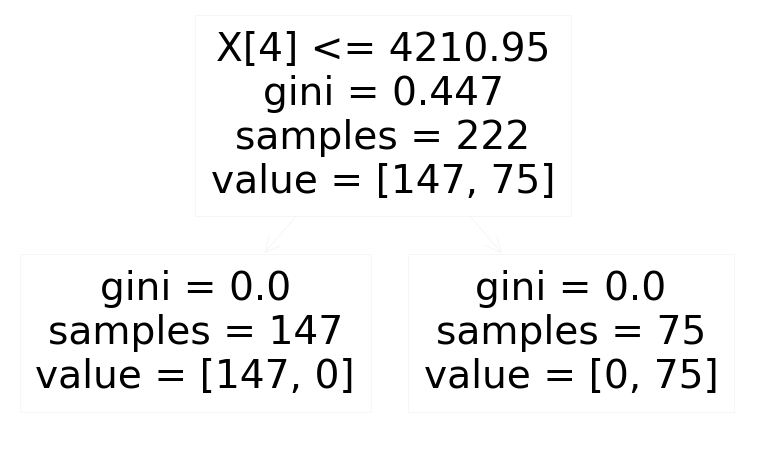

In [70]:
# as the result of the best parameters is GINI, let's calculate it using 
library matplotlib

# plot size 
plt.figure(figsize=(12,8))

# import model from sklearn
from sklearn import tree
from sklearn.tree import DecisionTreeClassifier
classifier = DecisionTreeClassifier()

# plot the tree
tree.plot_tree(classifier.fit(X_train, y_train)) 

Comments: Gini index in decision tree provide the amount of probability of a specific feature that is classified incorrectly when selected randomly, and in our case 

when Gini = '0', it is a leaf node with only one class (pure), and we can see that on that here on both leafes on the bottom of the results

We can see a total of 222 smples (147+75), with a Gini impurity 0.447 (almost the maximum of 0.5)

We can see the root node as skewness of the wavelet, of <=4210.95, we have 147 samples, the 75 are above that value; 
So for condition <=4210.95 TRUE we have calculated GINI = 0.447 (impure)

In [71]:
# Using  Cross validation to endure model is robust and valid

# import libraries and classifier    
from sklearn import datasets
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import KFold, cross_val_score

clf = DecisionTreeClassifier(random_state=42)

# K-fold cross validation of 5 random subsets (20% each)
k_folds = KFold(n_splits = 5)

scores = cross_val_score(clf, X, y, cv = k_folds)

# print results
print("Cross Validation Scores: ", scores)
print("Average CV Score: ", scores.mean())
print("Number of CV Scores used in Average: ", len(scores))

Cross Validation Scores:  [1.         1.         0.98305085 1.         1.        ]
Average CV Score:  0.9966101694915255
Number of CV Scores used in Average:  5


Comments: for the 5 subsets, almost all of them have 100% validation (one is 98.3%), and on average 99.66% meaning an excellent score of validating my tree decision model

Regression


After classification I will do some regression for Machine Learning, as my dataset is ideal for forecasting

In [72]:
# defining variable ind. (X) and target (Y)
X = np.array(dfml[["urban population", "rural population","GDP","Agric. production"]])

# I define the target will check values
y = np.array(dfml[["agric. prod. per capita"]])

In [73]:
# again, Ill use lazypredict to check regression algorithms

from lazypredict.Supervised import LazyRegressor

In [74]:
# using regressor from lazypredict
reg = LazyRegressor(verbose=0, 
                    ignore_warnings=False, 
                    custom_metric=None)

# train and test data will be predicted for each model 
models, predictions = reg.fit(xtrain, xtest, ytrain, ytest)
models

 22%|██▏       | 9/41 [00:00<00:03,  9.14it/s]

GammaRegressor model failed to execute
Some value(s) of y are out of the valid range for family GammaDistribution


 39%|███▉      | 16/41 [00:01<00:02,  9.58it/s]

KNeighborsRegressor model failed to execute
unsupported operand type(s) for /: 'str' and 'int'


 78%|███████▊  | 32/41 [00:02<00:00, 15.91it/s]

RANSACRegressor model failed to execute
RANSAC could not find a valid consensus set. All `max_trials` iterations were skipped because each randomly chosen sub-sample failed the passing criteria. See estimator attributes for diagnostics (n_skips*).


100%|██████████| 41/41 [00:02<00:00, 14.62it/s]


,Adjusted R-Squared,R-Squared,RMSE,Time Taken
Model,,,,
AdaBoostRegressor,1.00,1.00,0.00,0.18
DecisionTreeRegressor,1.00,1.00,0.00,0.02
RandomForestRegressor,1.00,1.00,0.00,0.21
BaggingRegressor,1.00,1.00,0.00,0.05
HistGradientBoostingRegressor,1.00,1.00,0.00,0.22
GradientBoostingRegressor,1.00,1.00,0.00,0.11
XGBRegressor,1.00,1.00,0.00,0.16
ExtraTreesRegressor,1.00,1.00,0.02,0.14
LGBMRegressor,1.00,1.00,0.02,0.07


Comments: lazypredict has sorted all algorithms accuracy and : 
- perfect accuracy (1 or 100%) on the 9 from AdaBoostClassifier to LGBMRegressor	
- almost perfect accuracy (0.83 or 83%) on the SVR and nuSVR

for my study I will use linear regression, because it has a high accuracy 73%

# forecasting

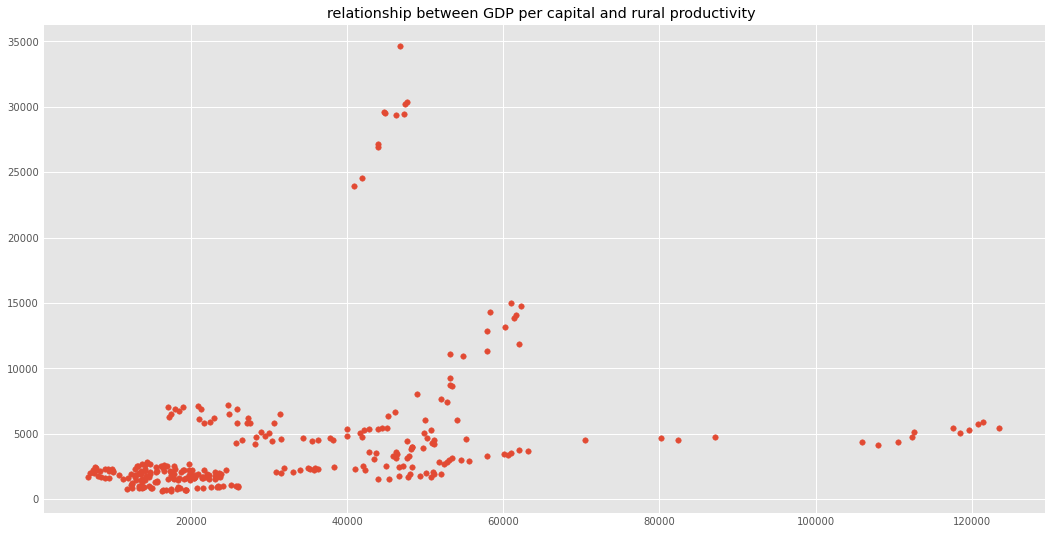

In [75]:
#Plot two dimensions 

# define size and colors
colors=['orange','blue']
size=[30,60]
 
# defining values for rural population (independent variable) with productivity 
# (dependent variable), in order to check if the production of agriculture will 
# have a significant impact on well being if the society

f1 = dfml['GDP per capita'].values
f2 = dfml['agric. prod. per capita'].values
 
# Plot
plt.title('relationship between GDP per capital and rural productivity ')
plt.scatter(f1, f2, s=size[0])
plt.show()

Comment: the area from 0 to 60000 (GDP per capita) and 0 to 10000 (agri. proc. per capita) is where the values are concentated.
some values are outside this area (outliers)

In [119]:
# assign x variable (train)

dfmlX =dfml[["agric. prod. per capita"]]
X_train = np.array(dfmlX)
y_train = dfml['GDP per capita'].values
 
# creation model
regr = linear_model.LinearRegression()
 
regr.fit(X_train, y_train)
 
# Predictions to define line
y_pred = regr.predict(X_train)
 
# calculation of necessary values

print('Coefficients: \n', regr.coef_)
print('Independent term: \n', regr.intercept_)
print("Mean squared error: %.2f" % mean_squared_error(y_train, y_pred))
print('Variance score: %.2f' % r2_score(y_train, y_pred))

Coefficients: 
 [1.32635798]
Independent term: 
 27616.859518505684
Mean squared error: 480759260.06
Variance score: 0.10


In [120]:
# let's check the model with 10500 (agric. prod., per capita/rural productivity)

testM = regr.predict([[10500]])
print(int(testM))

41543


In [79]:
# as an extra, I'll add a 3D model, with a new variable (rural population)

# I add sum of the 
sum = (dfml["rural population"] + dfml['agric. prod. per capita'].fillna(0) + dfml['GDP per capita'])

# define data
dfmlX2 =  pd.DataFrame()
dfmlX2["rural population"] = dfml["rural population"]
dfmlX2["sum"] = sum

# define train data 
XY_train = np.array(dfmlX2)
z_train = dfml['rural population'].values

In [80]:
# Creation of a new object of linear regression
regr2 = linear_model.LinearRegression()
 
# we train the model with 2 dimensions, in order to get 2 coef to plot in 3D
regr2.fit(XY_train, z_train)
 
# prediction over the train data
z_pred = regr2.predict(XY_train)
 
# coeficients
print('Coefficients: \n', regr2.coef_)
print("Mean squared error: %.2f" % mean_squared_error(z_train, z_pred))

# Variance score with 1.0 the best value
print('Variance score: %.2f' % r2_score(z_train, z_pred))

Coefficients: 
 [1. 0.]
Mean squared error: 0.00
Variance score: 1.00


Text(0.5, 0.92, 'Irish agriculture')

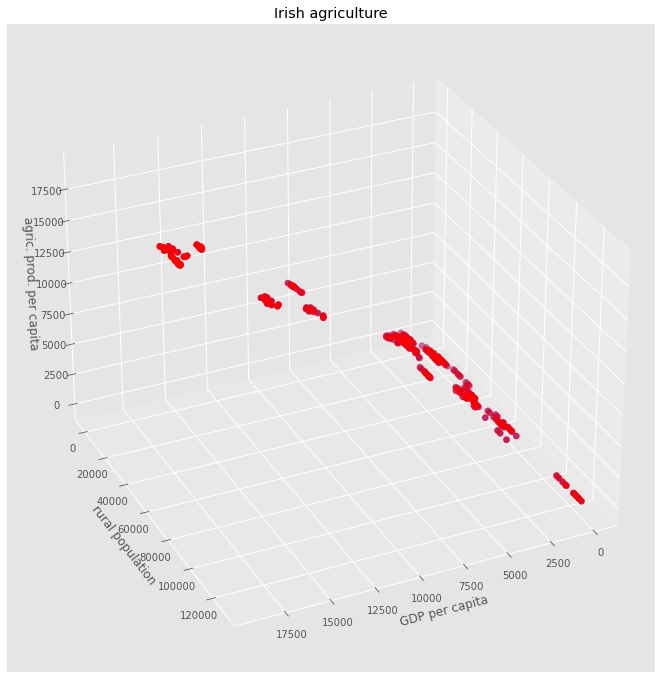

In [81]:
fig = plt.figure()
ax = Axes3D(fig)
 
# we create a canvas to plot the data
xx, yy = np.meshgrid(np.linspace(0, 3500, num=10), np.linspace(0, 60, num=10))
 
# calculate values for x and y
nuevoX = (regr2.coef_[0] * xx)
nuevoY = (regr2.coef_[1] * yy) 
 
# calculate values for z. 
z = (nuevoX + nuevoY + regr2.intercept_)
 
# Graf the data
ax.plot_surface(xx, yy, z, alpha=0.2, cmap='hot')
 
# Gra. in blue the values in 3D
ax.scatter(XY_train[:, 0], XY_train[:, 1], z_train, c='blue',s=30)
 
# Graf in blue the values in
ax.scatter(XY_train[:, 0], XY_train[:, 1], z_pred, c='red',s=40)
 
ax.view_init(elev=30., azim=65)

# set labels to plot
# ax.set_xlabel('rural population')
ax.set_xlabel('GDP per capita')
ax.set_ylabel('rural population')
ax.set_zlabel('agric. prod. per capita')

#ax.set_zlabel('GDP per capita')
ax.set_title('Irish agriculture')

Comments: there some relationship between the three variables, because see a line with those values. 

# times series

As my dataframe is using data information about Irish production, on good model to use is time series, because this models has several benefits from cleaning data, understanding it and also provide forecast on future data points. 

I’ll run through an example of Irish Production forecasting using a SARIMA or Seasonal Autoregressive Integrated Moving Average is a model that supports univariate time series data with a seasonal component

Froom 1990 to 2020, I’ll gather Irish Agriculture Production data and create a model to predict production after 2020, and its effectiveness will be measured using mean absolute percentage error.

In [94]:
# I'll use another dataset from Agriculture Production Ireland, using the 
# same process in FAO, by querying the data I wan, from years 1991 to 2020, 
# Gross Production Value in current thousand US$, and for Ireland

# load dataset
dfts =pd.read_csv("prod_ireland.csv")

In [95]:
# Now importing the libraries for time series
from datetime import date, timedelta
import datetime
import matplotlib.pyplot as plt
plt.style.use('fivethirtyeight')

# import models
from statsmodels.tsa.seasonal import seasonal_decompose
from statsmodels.graphics.tsaplots import plot_pacf
from statsmodels.tsa.arima_model import ARIMA
import statsmodels.api as sm
import warnings

In [96]:
# time to clean the dataset, deleting useless columns (drop) 
# like I used in EDA 

dfts.drop('Domain Code', axis = 1, inplace = True)
dfts.drop('Domain', axis = 1, inplace = True)
dfts.drop('Element Code', axis = 1, inplace = True)
dfts.drop('Element', axis = 1, inplace = True)
dfts.drop('Item Code (CPC)', axis = 1, inplace = True)
dfts.drop('Item', axis = 1, inplace = True)
dfts.drop('Year Code', axis = 1, inplace = True)
dfts.drop('Flag', axis = 1, inplace = True)
dfts.drop('Unit', axis = 1, inplace = True)
dfts.drop('Flag Description', axis = 1, inplace = True)
dfts.drop('Area Code (M49)', axis = 1, inplace = True)
dfts.drop('Area', axis = 1, inplace = True)

In [97]:
# change names on dataset, as columns values with numerical values needs to be
# called Irish Agric. Production

dfts = dfts.rename(columns = {"Value":"Irish Agric. Production"})

# print first four rows
dfts.head(4)

,Year,Irish Agric. Production
0,1991,4991918
1,1992,5495694
2,1993,4761986
3,1994,4645121


Text(0.5, 1.0, 'Irish production from 1990 to 2020 (Billion USD)')

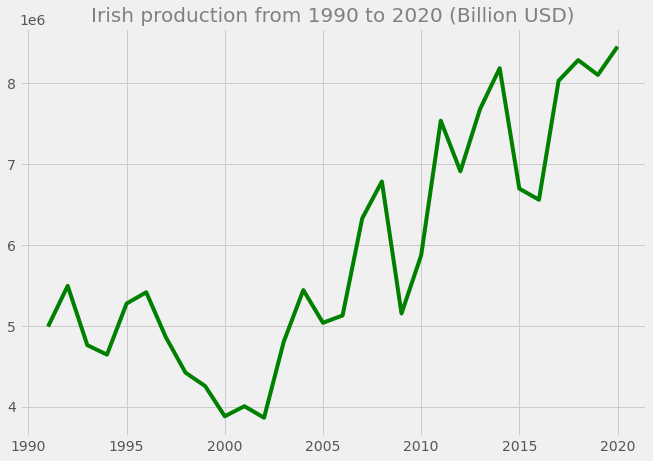

In [98]:
# now graphs to show evolution in Irish production from 1990 to 2020 (Billion USD)

# plot the dataframe using size 10,7 for chart dimensions and green color for the line 
plt.figure(figsize=(10, 7))
plt.plot(dfts["Year"], dfts["Irish Agric. Production"], color="green")

# plot the dataframe with title, using size 20, using grey color 
plt.title("Irish production from 1990 to 2020 (Billion USD)",fontsize = 20, color = 'grey')

Comments: I can see that Irish Agric. production has been up and down from 1990 to 2020.
The lowest production year was 2002 (3,864 Musd), and the highest is 2020 (8,454 Musd)
from 2002 to 2020, Agriculture production is growing but some decrease in 2005, 2009, 2016.

When analyzing a time series, I need to identify at least three insightful aspects of the data like autocorrelation, seasonality, and stationarity

stationarity to check how little a time series’ mean and variance changes over time, and for that I'll use the augmented Dickey-Fuller test

In [99]:
#Augmented Dickey-Fuller test

from statsmodels.tsa.stattools import adfuller

print('Augmented Dickey-Fuller unit root test')
data = dfts['Irish Agric. Production']
stat, p, lags, obs, crit, t = adfuller(data)
print('stat=%.3f, p=%.3f' % (stat, p))
if p > 0.05:
 print('Probably not Stationary')
else:
 print('Probably Stationary')


Augmented Dickey-Fuller unit root test
stat=0.502, p=0.985
Probably not Stationary


The null hypothesis (p-value > 0.05) for this test is that the data is not stationary. 
Based on our output from the code above, the p-value was calculated to be ~ 0, 
so we can reject the null hypothesis and say that the data is in fact stationary. 
On to modeling

seasonality to check is observations and patterns repeat themselves at regular intervals.

<Figure size 1152x648 with 0 Axes>

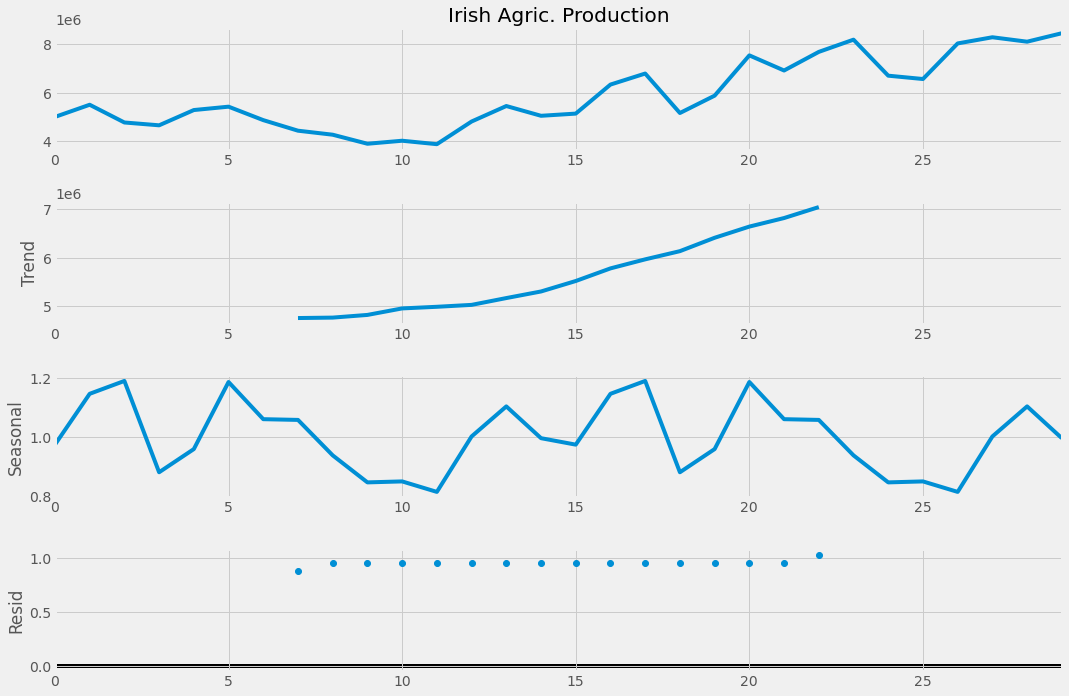

In [100]:
# plot the time series seasonality

result = seasonal_decompose(dfts["Irish Agric. Production"], 
                            model='multiplicative', freq = 15)
fig = plt.figure()  
fig = result.plot()  
fig.set_size_inches(15, 10)

Comments: the seasonal line is not linear, having ups and downs for Irish Agric. production, showing some seasonality.
this seasonality was also confirmed with evolution plot above, with not liner production durin years analysed.

The trend range is between 4 and 7.

autocorrelation

I' ll use a autocorrelation plot, commonly-used tool for checking randomness in a dataset.

<AxesSubplot:xlabel='Lag', ylabel='Autocorrelation'>

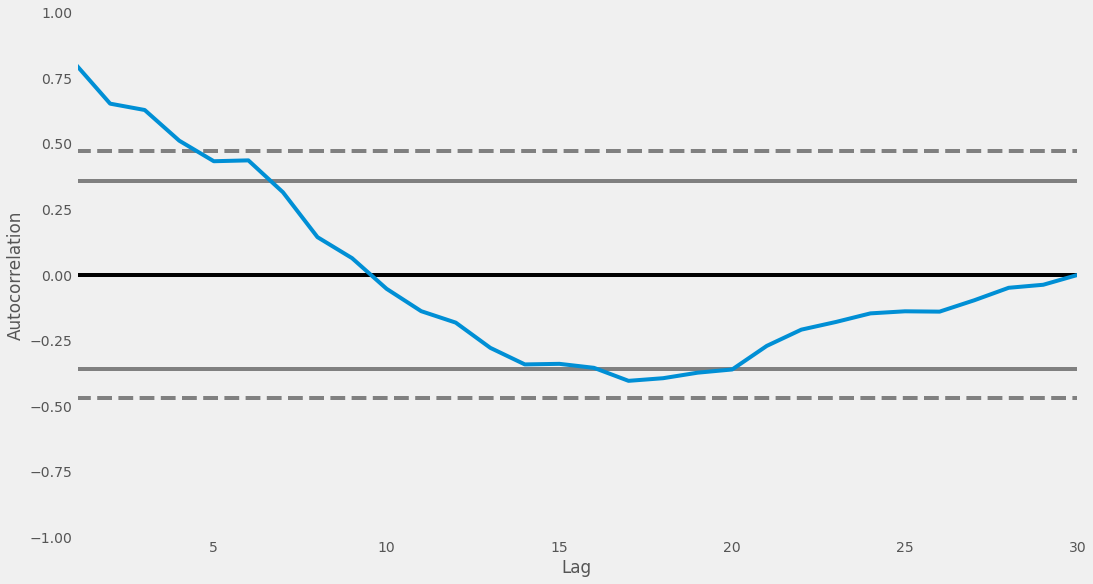

In [101]:
# let's see the degree of similarity between my time series, a lagged 
# version of itself, over sucessive time interval

pd.plotting.autocorrelation_plot(dfts["Irish Agric. Production"])

Comments: 
The observation of the plot is a positive autocorrelation, with a smooth curve, meaning that a time serie will be linear.

So now I need to forecast my data using predictions and my historical data.
I need a model to forecast and for time series SARIMAX will help, as it includes seasonal effects and exogenous factors with the autoregressive and moving average component in time series model

In [103]:
# Fit the model

model = sm.tsa.statespace.SARIMAX(dfts['Irish Agric. Production'], 
                                  trend='c', order=(1,1,(1,0,0,1)))
res = model.fit(disp=False)
print(res.summary())


                                  SARIMAX Results                                  
Dep. Variable:     Irish Agric. Production   No. Observations:                   30
Model:               SARIMAX(1, 1, [1, 4])   Log Likelihood                -431.182
Date:                     Fri, 06 Jan 2023   AIC                            872.365
Time:                             12:08:41   BIC                            879.201
Sample:                                  0   HQIC                           874.506
                                      - 30                                         
Covariance Type:                       opg                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
intercept   7.624e+04   4.66e+05      0.164      0.870   -8.37e+05     9.9e+05
ar.L1         -0.7378      0.411     -1.793      0.073      -1.544       0.069
ma.L1       

# Comments: 

# INTERACTIVE DASHBOARD

In [106]:
# I need to import libraries to create interactive dashboard

import plotly as py

In [107]:
# let's change the name of the dataframe for interactive dashboard
dfinter=df

dfinter.head(3)

,Country,Year,urban population,rural population,GDP,Agric. production,agric. prod. per capita,GDP per capita,target
0,Austria,2010,4827,3582,391892746.50,6345092,1771.00,46598.70,0
1,Austria,2011,4831,3628,431120310.10,7548229,2080.50,50960.70,0
2,Austria,2012,4867,3650,409425234.20,7135291,1954.90,48068.40,0


In [108]:
# Group by, to select average from 1990 to 2020 (agric. productivity)
dfinter.groupby('Country')['agric. prod. per capita'].mean()

Country
Austria        1816.64
Belgium       28713.36
Bulgaria       2177.77
Croatia         895.75
Cyprus         1784.95
Czechia        1827.04
Denmark       13025.03
Estonia        1929.37
Finland        4087.85
France         5110.06
Germany        2713.34
Greece         6807.38
Hungary        2558.60
Ireland        4225.18
Italy          2254.99
Latvia         2048.66
Lithuania      2233.76
Luxembourg     5073.13
Malta          5694.73
Netherlands    7291.35
Poland         1343.25
Portugal       1654.65
Romania        1878.40
Slovakia        752.01
Slovenia        972.70
Spain          4870.13
Sweden         3110.06
Name: agric. prod. per capita, dtype: float64

In [109]:
# import Plotly Components

import plotly.express as px
import plotly.graph_objs as go
from plotly.subplots import make_subplots
from plotly.offline import download_plotlyjs, init_notebook_mode, plot, iplot

In [112]:
# Creating the visualization, using Choropleth maps

fig = go.Figure(data=go.Choropleth( locations = dfinter['Country'], 
                                   locationmode = 'country names', 
                                   z = dfinter['agric. prod. per capita'], 
                                   colorscale = 'Reds', 
                                   marker_line_color = 'black', 
                                   marker_line_width = 0.5, ))
fig.update_layout( title_text = 'Average EU Agric. productivity 2010 to 2020', 
                  title_x = 0.5, geo=dict( showframe = False, 
                                          showcoastlines = False, 
                                          projection_type = 'equirectangular' ) ) 
fig.show()

In [111]:
# Import express model from plotly
import plotly.express as px

# Plot the scatterplot using Plotly. I ploy Country vs Agri. productivity
fig = px.scatter(dfinter, x='Country', y='agric. prod. per capita')
fig.update_traces(mode='markers+lines')
fig.show()

# sentimental analyse

In [2]:
import pandas as pd
!pip install textblob

In [3]:
train = pd.read_csv('dataset_twitter-url-scraper_2023-01-06_09.csv')

In [4]:
train.head(5)

,conversation_id,created_at,favorite_count,full_text,hashtags/0,hashtags/1,hashtags/2,hashtags/3,hashtags/4,hashtags/5,...,user_mentions/22/screen_name,user_mentions/23/id_str,user_mentions/23/name,user_mentions/23/screen_name,user_mentions/24/id_str,user_mentions/24/name,user_mentions/24/screen_name,user_mentions/25/id_str,user_mentions/25/name,user_mentions/25/screen_name
0,1.593890e+18,2022-11-19T08:39:08.000Z,18,Scaling up must not mean a loss of quality. @a...,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,1.593660e+18,2022-11-18T17:45:40.000Z,36,@boucherhayes meets Dr Sharon Parr and Dr Bren...,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,1.575050e+18,2022-09-28T08:50:52.000Z,10,Research has found links between #COVID19 and ...,COVID19,environmental,Agriculture,ClimateChange,disease,Wildlife,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,1.562920e+18,2022-08-25T21:37:25.000Z,13,If you value your health in Australia do not m...,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,1.541900e+18,2022-06-28T21:52:06.000Z,17,Fascinating day on the farm of @maynoothfarmer...,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [5]:
train.shape

(100, 172)

In [6]:
train['word_count'] = train['full_text'].apply(lambda x: len(str(x).split(" ")))

In [7]:
train[['full_text','word_count']].head()

,full_text,word_count
0,Scaling up must not mean a loss of quality. @a...,46
1,@boucherhayes meets Dr Sharon Parr and Dr Bren...,38
2,Research has found links between #COVID19 and ...,28
3,If you value your health in Australia do not m...,50
4,Fascinating day on the farm of @maynoothfarmer...,40


In [8]:
train['char_count'] = train['full_text'].str.len() 

In [9]:
## this also includes spaces
train[['full_text','char_count']].head()

,full_text,char_count
0,Scaling up must not mean a loss of quality. @a...,273
1,@boucherhayes meets Dr Sharon Parr and Dr Bren...,244
2,Research has found links between #COVID19 and ...,269
3,If you value your health in Australia do not m...,269
4,Fascinating day on the farm of @maynoothfarmer...,306


In [10]:
train.head(5)

,conversation_id,created_at,favorite_count,full_text,hashtags/0,hashtags/1,hashtags/2,hashtags/3,hashtags/4,hashtags/5,...,user_mentions/23/name,user_mentions/23/screen_name,user_mentions/24/id_str,user_mentions/24/name,user_mentions/24/screen_name,user_mentions/25/id_str,user_mentions/25/name,user_mentions/25/screen_name,word_count,char_count
0,1.593890e+18,2022-11-19T08:39:08.000Z,18,Scaling up must not mean a loss of quality. @a...,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,46,273
1,1.593660e+18,2022-11-18T17:45:40.000Z,36,@boucherhayes meets Dr Sharon Parr and Dr Bren...,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,38,244
2,1.575050e+18,2022-09-28T08:50:52.000Z,10,Research has found links between #COVID19 and ...,COVID19,environmental,Agriculture,ClimateChange,disease,Wildlife,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,28,269
3,1.562920e+18,2022-08-25T21:37:25.000Z,13,If you value your health in Australia do not m...,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,50,269
4,1.541900e+18,2022-06-28T21:52:06.000Z,17,Fascinating day on the farm of @maynoothfarmer...,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,40,306


In [11]:
def avg_word(sentence):
  words = sentence.split()
  return (sum(len(word) for word in words)/len(words))

In [12]:
#train['id'] = train['full_text'].apply(lambda x: avg_word(x))

In [13]:
train[['full_text','id']].head()

,full_text,id
0,Scaling up must not mean a loss of quality. @a...,1.593890e+18
1,@boucherhayes meets Dr Sharon Parr and Dr Bren...,1.593660e+18
2,Research has found links between #COVID19 and ...,1.575050e+18
3,If you value your health in Australia do not m...,1.562920e+18
4,Fascinating day on the farm of @maynoothfarmer...,1.541900e+18


In [14]:
import nltk
nltk.download('stopwords')

[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\User\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


True

In [15]:
from nltk.corpus import stopwords
stop = stopwords.words('english')

In [16]:
train['stopwords'] = train['full_text'].apply(lambda x: len([x for x in x.split() if x in stop]))
train[['full_text','stopwords']].head()

,full_text,stopwords
0,Scaling up must not mean a loss of quality. @a...,17
1,@boucherhayes meets Dr Sharon Parr and Dr Bren...,14
2,Research has found links between #COVID19 and ...,5
3,If you value your health in Australia do not m...,22
4,Fascinating day on the farm of @maynoothfarmer...,8


In [17]:
train['hastags'] = train['full_text'].apply(lambda x: len([x for x in x.split() if x.startswith('#')]))
train[['full_text','hastags']].head()

,full_text,hastags
0,Scaling up must not mean a loss of quality. @a...,0
1,@boucherhayes meets Dr Sharon Parr and Dr Bren...,0
2,Research has found links between #COVID19 and ...,6
3,If you value your health in Australia do not m...,0
4,Fascinating day on the farm of @maynoothfarmer...,0


In [18]:
train['numerics'] = train['full_text'].apply(lambda x: len([x for x in x.split() if x.isdigit()]))
train[['full_text','numerics']].head()

,full_text,numerics
0,Scaling up must not mean a loss of quality. @a...,0
1,@boucherhayes meets Dr Sharon Parr and Dr Bren...,0
2,Research has found links between #COVID19 and ...,0
3,If you value your health in Australia do not m...,1
4,Fascinating day on the farm of @maynoothfarmer...,0


In [19]:
train['upper'] = train['full_text'].apply(lambda x: len([x for x in x.split() if x.isupper()]))
train[['full_text','upper']].head()

,full_text,upper
0,Scaling up must not mean a loss of quality. @a...,1
1,@boucherhayes meets Dr Sharon Parr and Dr Bren...,1
2,Research has found links between #COVID19 and ...,2
3,If you value your health in Australia do not m...,1
4,Fascinating day on the farm of @maynoothfarmer...,2


In [20]:
train['full_text'] = train['full_text'].apply(lambda x: " ".join(x.lower() for x in x.split()))
train['full_text'].head()

0    scaling up must not mean a loss of quality. @a...
1    @boucherhayes meets dr sharon parr and dr bren...
2    research has found links between #covid19 and ...
3    if you value your health in australia do not m...
4    fascinating day on the farm of @maynoothfarmer...
Name: full_text, dtype: object

In [21]:
train['full_text'] = train['full_text'].str.replace('[^\w\s]','')
train['full_text'].head()

0    scaling up must not mean a loss of quality agr...
1    boucherhayes meets dr sharon parr and dr brend...
2    research has found links between covid19 and e...
3    if you value your health in australia do not m...
4    fascinating day on the farm of maynoothfarmer ...
Name: full_text, dtype: object

In [22]:
from nltk.corpus import stopwords
stop = stopwords.words('english')
train['full_text'] = train['full_text'].apply(lambda x: " ".join(x for x in x.split() if x not in stop))
train['full_text'].head()

0    scaling must mean loss quality agriculture_ie ...
1    boucherhayes meets dr sharon parr dr brendan d...
2    research found links covid19 environmental fac...
3    value health australia move country agricultur...
4    fascinating day farm maynoothfarmer ecaf_ca fr...
Name: full_text, dtype: object

In [23]:
freq = pd.Series(' '.join(train['full_text']).split()).value_counts()[:10]
freq

agriculture    92
quality        91
europe         77
food           30
amp            29
water          18
farmers        14
european       14
products       12
europes        11
dtype: int64

In [24]:
freq = list(freq.index)
train['full_text'] = train['full_text'].apply(lambda x: " ".join(x for x in x.split() if x not in freq))
train['full_text'].head()

0    scaling must mean loss agriculture_ie needs li...
1    boucherhayes meets dr sharon parr dr brendan d...
2    research found links covid19 environmental fac...
3    value health australia move country chemicals ...
4    fascinating day farm maynoothfarmer ecaf_ca fr...
Name: full_text, dtype: object

In [25]:
freq = pd.Series(' '.join(train['full_text']).split()).value_counts()[-10:]
freq

claims                1
newchapter4europe     1
close                 1
httpstcood8xqchcgp    1
ugandan               1
youtube               1
fair                  1
landwirtschaft        1
stand                 1
governments           1
dtype: int64

In [26]:
freq = list(freq.index)
train['full_text'] = train['full_text'].apply(lambda x: " ".join(x for x in x.split() if x not in freq))
train['full_text'].head()

0    scaling must mean loss agriculture_ie needs li...
1    boucherhayes meets dr sharon parr dr brendan d...
2    research found links covid19 environmental fac...
3    value health australia move country chemicals ...
4    fascinating day farm maynoothfarmer ecaf_ca fr...
Name: full_text, dtype: object

In [27]:
from textblob import TextBlob
train['full_text'][:5].apply(lambda x: str(TextBlob(x).correct()))

0    sealing must mean loss agriculture_ie needs li...
1    boucherhayes meets dr charon parr dr brandon u...
2    research found links covid19 environmental fac...
3    value health australia move country chemicals ...
4    fascinating day farm maynoothfarmer ecaf_ca fr...
Name: full_text, dtype: object

In [28]:
nltk.download('punkt')
TextBlob(train['full_text'][1]).words

[nltk_data] Downloading package punkt to
[nltk_data]     C:\Users\User\AppData\Roaming\nltk_data...
[nltk_data]   Package punkt is already up-to-date!


WordList(['boucherhayes', 'meets', 'dr', 'sharon', 'parr', 'dr', 'brendan', 'dunford', 'burrenlife', 'resigned', 'roles', 'find', 'believe', 'acres', 'wont', 'properly', 'serve', 'burren', 'saturday', '810', 'rteradio1', 'httpstco5ce7cs0rwn'])

In [29]:
from nltk.stem import PorterStemmer
st = PorterStemmer()
train['full_text'][:5].apply(lambda x: " ".join([st.stem(word) for word in x.split()]))

0    scale must mean loss agriculture_i need listen...
1    boucherhay meet dr sharon parr dr brendan dunf...
2    research found link covid19 environment factor...
3    valu health australia move countri chemic 70 u...
4    fascin day farm maynoothfarm ecaf_ca friend ac...
Name: full_text, dtype: object

In [30]:
nltk.download('wordnet')
from textblob import Word
train['full_text'] = train['full_text'].apply(lambda x: " ".join([Word(word).lemmatize() for word in x.split()]))
train['full_text'].head()

[nltk_data] Downloading package wordnet to
[nltk_data]     C:\Users\User\AppData\Roaming\nltk_data...
[nltk_data]   Package wordnet is already up-to-date!


0    scaling must mean loss agriculture_ie need lis...
1    boucherhayes meet dr sharon parr dr brendan du...
2    research found link covid19 environmental fact...
3    value health australia move country chemical 7...
4    fascinating day farm maynoothfarmer ecaf_ca fr...
Name: full_text, dtype: object

In [31]:
TextBlob(train['full_text'][0]).ngrams(2)

[WordList(['scaling', 'must']),
 WordList(['must', 'mean']),
 WordList(['mean', 'loss']),
 WordList(['loss', 'agriculture_ie']),
 WordList(['agriculture_ie', 'need']),
 WordList(['need', 'listen']),
 WordList(['listen', 'brendansharon']),
 WordList(['brendansharon', 'act']),
 WordList(['act', 'dafm']),
 WordList(['dafm', 'leadership']),
 WordList(['leadership', 'resultsbased']),
 WordList(['resultsbased', 'scheme']),
 WordList(['scheme', 'renowned']),
 WordList(['renowned', 'acrs']),
 WordList(['acrs', 'need']),
 WordList(['need', 'take']),
 WordList(['take', 'leap']),
 WordList(['leap', 'put']),
 WordList(['put', 'place']),
 WordList(['place', 'whats']),
 WordList(['whats', 'needed']),
 WordList(['needed', 'support']),
 WordList(['support', 'farm']),
 WordList(['farm', 'biodiversity'])]

In [32]:
tf1 = (train['full_text'][1:2]).apply(lambda x: pd.value_counts(x.split(" "))).sum(axis = 0).reset_index()
tf1.columns = ['words','tf']
tf1

,words,tf
0,dr,2
1,boucherhayes,1
2,httpstco5ce7cs0rwn,1
3,dunford,1
4,meet,1
5,810,1
6,brendan,1
7,believe,1
8,resigned,1
9,role,1


In [33]:
import numpy as np

for i,word in enumerate(tf1['words']):
  tf1.loc[i, 'idf'] = np.log(train.shape[0]/(len(train[train['full_text'].str.contains(word)])))

tf1

,words,tf,idf
0,dr,2,2.813411
1,boucherhayes,1,4.605170
2,httpstco5ce7cs0rwn,1,4.605170
3,dunford,1,4.605170
4,meet,1,3.912023
5,810,1,4.605170
6,brendan,1,3.912023
7,believe,1,3.912023
8,resigned,1,4.605170
9,role,1,3.218876


In [34]:
tf1['tfidf'] = tf1['tf'] * tf1['idf']
tf1

,words,tf,idf,tfidf
0,dr,2,2.813411,5.626821
1,boucherhayes,1,4.605170,4.605170
2,httpstco5ce7cs0rwn,1,4.605170,4.605170
3,dunford,1,4.605170,4.605170
4,meet,1,3.912023,3.912023
5,810,1,4.605170,4.605170
6,brendan,1,3.912023,3.912023
7,believe,1,3.912023,3.912023
8,resigned,1,4.605170,4.605170
9,role,1,3.218876,3.218876


In [35]:
from sklearn.feature_extraction.text import TfidfVectorizer
tfidf = TfidfVectorizer(max_features=1000, lowercase=True, analyzer='word',
 stop_words= 'english',ngram_range=(1,1))
train_vect = tfidf.fit_transform(train['full_text'])

train_vect

<100x1000 sparse matrix of type '<class 'numpy.float64'>'
	with 1490 stored elements in Compressed Sparse Row format>

In [36]:
print(train_vect)

  (0, 121)	0.17299226607656268
  (0, 356)	0.1812416097486918
  (0, 850)	0.1812416097486918
  (0, 563)	0.22270021334847878
  (0, 977)	0.2043544889993757
  (0, 627)	0.22270021334847878
  (0, 474)	0.22270021334847878
  (0, 29)	0.22270021334847878
  (0, 720)	0.22270021334847878
  (0, 765)	0.22270021334847878
  (0, 734)	0.22270021334847878
  (0, 471)	0.22270021334847878
  (0, 235)	0.22270021334847878
  (0, 30)	0.22270021334847878
  (0, 135)	0.22270021334847878
  (0, 488)	0.22270021334847878
  (0, 562)	0.29113394132272197
  (0, 48)	0.2043544889993757
  (0, 499)	0.2043544889993757
  (0, 531)	0.22270021334847878
  (0, 763)	0.22270021334847878
  (1, 744)	0.21817260550789844
  (1, 18)	0.21817260550789844
  (1, 758)	0.21817260550789844
  (1, 141)	0.21817260550789844
  :	:
  (97, 552)	0.2258553135831346
  (97, 900)	0.2155753447365369
  (98, 51)	0.28827723660854937
  (98, 407)	0.28827723660854937
  (98, 155)	0.28827723660854937
  (98, 914)	0.28827723660854937
  (98, 587)	0.28827723660854937
  (98, 

In [37]:
from sklearn.feature_extraction.text import CountVectorizer
bow = CountVectorizer(max_features=1000, lowercase=True, ngram_range=(1,1),analyzer = "word")
train_bow = bow.fit_transform(train['full_text'])
train_bow

<100x1000 sparse matrix of type '<class 'numpy.int64'>'
	with 1542 stored elements in Compressed Sparse Row format>

In [38]:
print(train_bow)

  (0, 747)	1
  (0, 534)	1
  (0, 505)	1
  (0, 472)	1
  (0, 49)	1
  (0, 539)	2
  (0, 461)	1
  (0, 143)	1
  (0, 31)	1
  (0, 244)	1
  (0, 444)	1
  (0, 718)	1
  (0, 749)	1
  (0, 704)	1
  (0, 30)	1
  (0, 849)	1
  (0, 447)	1
  (0, 669)	1
  (0, 609)	1
  (0, 974)	1
  (0, 540)	1
  (0, 839)	1
  (0, 374)	1
  (0, 129)	1
  (1, 138)	1
  :	:
  (97, 51)	1
  (97, 266)	1
  (97, 854)	1
  (97, 525)	1
  (98, 544)	1
  (98, 278)	1
  (98, 295)	1
  (98, 688)	2
  (98, 923)	1
  (98, 566)	1
  (98, 907)	1
  (98, 163)	1
  (98, 52)	1
  (99, 374)	2
  (99, 622)	1
  (99, 845)	1
  (99, 408)	1
  (99, 844)	1
  (99, 376)	1
  (99, 435)	1
  (99, 996)	1
  (99, 575)	1
  (99, 46)	1
  (99, 306)	1
  (99, 222)	1


In [39]:
train['full_text'][:5].apply(lambda x: TextBlob(x).sentiment)

0                              (-0.3125, 0.6875)
1                                     (0.0, 0.1)
2                                     (0.0, 0.0)
3    (-0.061904761904761914, 0.5095238095238096)
4                     (0.65, 0.7833333333333333)
Name: full_text, dtype: object

In [40]:
train['sentiment'] = train['full_text'].apply(lambda x: TextBlob(x).sentiment[0] )
train[['full_text','sentiment']].head()

,full_text,sentiment
0,scaling must mean loss agriculture_ie need lis...,-0.312500
1,boucherhayes meet dr sharon parr dr brendan du...,0.000000
2,research found link covid19 environmental fact...,0.000000
3,value health australia move country chemical 7...,-0.061905
4,fascinating day farm maynoothfarmer ecaf_ca fr...,0.650000


In [41]:
train.head(5)

,conversation_id,created_at,favorite_count,full_text,hashtags/0,hashtags/1,hashtags/2,hashtags/3,hashtags/4,hashtags/5,...,user_mentions/25/id_str,user_mentions/25/name,user_mentions/25/screen_name,word_count,char_count,stopwords,hastags,numerics,upper,sentiment
0,1.593890e+18,2022-11-19T08:39:08.000Z,18,scaling must mean loss agriculture_ie need lis...,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,46,273,17,0,0,1,-0.312500
1,1.593660e+18,2022-11-18T17:45:40.000Z,36,boucherhayes meet dr sharon parr dr brendan du...,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,38,244,14,0,0,1,0.000000
2,1.575050e+18,2022-09-28T08:50:52.000Z,10,research found link covid19 environmental fact...,COVID19,environmental,Agriculture,ClimateChange,disease,Wildlife,...,NaN,NaN,NaN,28,269,5,6,0,2,0.000000
3,1.562920e+18,2022-08-25T21:37:25.000Z,13,value health australia move country chemical 7...,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,50,269,22,0,1,1,-0.061905
4,1.541900e+18,2022-06-28T21:52:06.000Z,17,fascinating day farm maynoothfarmer ecaf_ca fr...,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,40,306,8,0,0,2,0.650000
